# amcat data analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
# reading the data
df=pd.read_excel(r"M:\innomatics data science\gen ai intership\task\amcat eda\data.xlsx")

In [3]:
pd.set_option('display.max_columns', None)
df

Unnamed: 0      ID   Salary        DOJ                  DOL  \
0         train  203097   420000 2012-06-01              present   
1         train  579905   500000 2013-09-01              present   
2         train  810601   325000 2014-06-01              present   
3         train  267447  1100000 2011-07-01              present   
4         train  343523   200000 2014-03-01  2015-03-01 00:00:00   
...         ...     ...      ...        ...                  ...   
3993      train   47916   280000 2011-10-01  2012-10-01 00:00:00   
3994      train  752781   100000 2013-07-01  2013-07-01 00:00:00   
3995      train  355888   320000 2013-07-01              present   
3996      train  947111   200000 2014-07-01  2015-01-01 00:00:00   
3997      train  324966   400000 2013-02-01              present   

                      Designation           JobCity Gender        DOB  \
0         senior quality engineer         Bangalore      f 1990-02-19   
1               assistant manager            Indore      m 1989-10-04   
2                systems engineer           Chennai      f 1992-08-03   
3        senior software engineer           Gurgaon      m 1989-12-05   
4                             get           Manesar      m 1991-02-27   
...                           ...               ...    ...        ...   
3993            software engineer        New Delhi       m 1987-04-15   
3994             technical writer         Hyderabad      f 1992-08-27   
3995  associate software engineer         Bangalore      m 1991-07-03   
3996           software developer  Asifabadbanglore      f 1992-03-20   
3997      senior systems engineer           Chennai      f 1991-02-26   

      10percentage                         10board  12graduation  \
0            84.30  board ofsecondary education,ap          2007   
1            85.40                            cbse          2007   
2            85.00                            cbse          2010   
3            85.60                            cbse          2007   
4            78.00                            cbse          2008   
...            ...                             ...           ...   
3993         52.09                            cbse          2006   
3994         90.00                     state board          2009   
3995         81.86                      bse,odisha          2008   
3996         78.72                     state board          2010   
3997         70.60                            cbse          2008   

      12percentage                             12board  CollegeID  \
0            95.80  board of intermediate education,ap       1141   
1            85.00                                cbse       5807   
2            68.20                                cbse         64   
3            83.60                                cbse       6920   
4            76.80                                cbse      11368   
...            ...                                 ...        ...   
3993         55.50                                cbse       6268   
3994         93.00                         state board       4883   
3995         65.50                         chse,odisha       9786   
3996         69.88                         state board        979   
3997         68.00                                cbse       6609   

      CollegeTier       Degree                             Specialization  \
0               2  B.Tech/B.E.                       computer engineering   
1               2  B.Tech/B.E.  electronics and communication engineering   
2               2  B.Tech/B.E.                     information technology   
3               1  B.Tech/B.E.                       computer engineering   
4               2  B.Tech/B.E.  electronics and communication engineering   
...           ...          ...                                        ...   
3993            2  B.Tech/B.E.                     information technology   
3994            2  B.Tech/B.E.  electronics and c

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.size

151924

In [6]:
df.shape

(3998, 38)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   ID                     3998 non-null   int64         
 1   Salary                 3998 non-null   int64         
 2   DOJ                    3998 non-null   datetime64[ns]
 3   DOL                    3998 non-null   object        
 4   Designation            3998 non-null   object        
 5   JobCity                3998 non-null   object        
 6   Gender                 3998 non-null   object        
 7   DOB                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  Col

In [8]:
df.isna().sum()

ID                       0
Salary                   0
DOJ                      0
DOL                      0
Designation              0
JobCity                  0
Gender                   0
DOB                      0
10percentage             0
10board                  0
12graduation             0
12percentage             0
12board                  0
CollegeID                0
CollegeTier              0
Degree                   0
Specialization           0
collegeGPA               0
CollegeCityID            0
CollegeCityTier          0
CollegeState             0
GraduationYear           0
English                  0
Logical                  0
Quant                    0
Domain                   0
ComputerProgramming      0
ElectronicsAndSemicon    0
ComputerScience          0
MechanicalEngg           0
ElectricalEngg           0
TelecomEngg              0
CivilEngg                0
conscientiousness        0
agreeableness            0
extraversion             0
nueroticism              0
o

In [9]:
df[df.duplicated]

Empty DataFrame
Columns: [ID, Salary, DOJ, DOL, Designation, JobCity, Gender, DOB, 10percentage, 10board, 12graduation, 12percentage, 12board, CollegeID, CollegeTier, Degree, Specialization, collegeGPA, CollegeCityID, CollegeCityTier, CollegeState, GraduationYear, English, Logical, Quant, Domain, ComputerProgramming, ElectronicsAndSemicon, ComputerScience, MechanicalEngg, ElectricalEngg, TelecomEngg, CivilEngg, conscientiousness, agreeableness, extraversion, nueroticism, openess_to_experience]
Index: []

# univariate analysis

# fuction for the univariate analysis of numerical column

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def num_col_uni(df, column_name):
  

  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column
    
  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Minimum and maximum values
  print(f"\nMinimum value of '{column_name}' column:", df[column_name].min())
  print(f"Maximum value of '{column_name}' column:", df[column_name].max())

  print("\n*************************************************************")

  # Distribution (if numeric)
  if pd.api.types.is_numeric_dtype(df[column_name]):
    print(f"\nDistribution of '{column_name}' column:")
    sns.distplot(df[column_name])
    plt.show()

  else:
    print(f"\n'{column_name}' column is not numeric. Distribution plot cannot be generated.")

  print("\n*************************************************************")

  # Skewness
  print(f"\nSkewness of '{column_name}' column:", df[column_name].skew())



# fuction for the univariate analysis of catogorical column

In [11]:

def cat_col_uni(df, column_name):
  

  # Check if column exists
  if column_name not in df.columns:
    print(f"Error: Column '{column_name}' does not exist in the DataFrame.")
    return

  # Description of the column
  print(f"Description of '{column_name}' column:")
  print(df[column_name].describe())

  print("\n*************************************************************")

  # Number of unique values
  print(f"\nNUnique values of '{column_name}' column:")
  print(df[column_name].nunique())

  print("\n*************************************************************")

  # Unique values
  print(f"\nUnique values of '{column_name}' column:")
  print(df[column_name].unique())

  print("\n*************************************************************")

  # Value counts
  print(f"\nValue counts of '{column_name}' column:")
  print(df[column_name].value_counts())

  print("\n*************************************************************")

  # Countplot
  print(f"\nCountplot of '{column_name}' column:")
  sns.countplot(x=df[column_name])
  plt.show()

  print("\n*************************************************************")

  # Mode
  print(f"\nMode of '{column_name}' column:")
  print(df[column_name].mode().tolist())

  print("\n*************************************************************")

 
  # Most frequent value and its percentage
  most_frequent_value = df[column_name].value_counts().idxmax()
  most_frequent_percentage = (df[column_name] == most_frequent_value).mean() * 100
  print(f"\nMost frequent value: {most_frequent_value} ({most_frequent_percentage:.2f}%)")

  print("\n*************************************************************")

  # Least frequent value and its percentage
  least_frequent_value = df[column_name].value_counts().idxmin()
  least_frequent_percentage = (df[column_name] == least_frequent_value).mean() * 100
  print(f"\nLeast frequent value: {least_frequent_value} ({least_frequent_percentage:.2f}%)")

  print("\n*************************************************************")
  print("values cpunt of the ",column_name, "is ",df[column_name].value_counts())

In [12]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

# uivariate analysis

# ID 

Description of 'ID' column:
count    3.998000e+03
mean     6.637945e+05
std      3.632182e+05
min      1.124400e+04
25%      3.342842e+05
50%      6.396000e+05
75%      9.904800e+05
max      1.298275e+06
Name: ID, dtype: float64

*************************************************************

NUnique values of 'ID' column:
3998

*************************************************************

Unique values of 'ID' column:
[203097 579905 810601 ... 355888 947111 324966]

*************************************************************

Minimum value of 'ID' column: 11244
Maximum value of 'ID' column: 1298275

*************************************************************

Distribution of 'ID' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


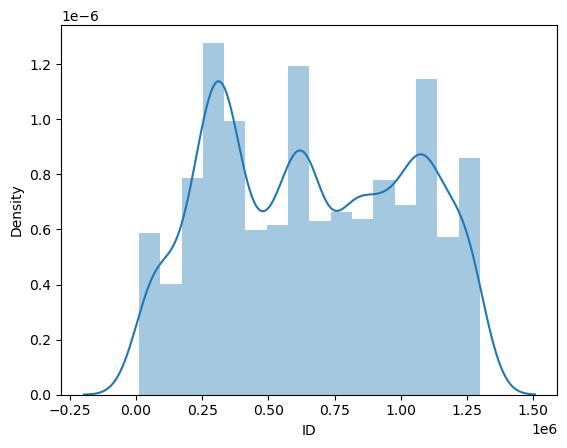


*************************************************************

Skewness of 'ID' column: 0.05477046850906638


In [13]:
num_col_uni(df,"ID")

# 'Salary'

Description of 'Salary' column:
count    3.998000e+03
mean     3.076998e+05
std      2.127375e+05
min      3.500000e+04
25%      1.800000e+05
50%      3.000000e+05
75%      3.700000e+05
max      4.000000e+06
Name: Salary, dtype: float64

*************************************************************

NUnique values of 'Salary' column:
177

*************************************************************

Unique values of 'Salary' column:
[ 420000  500000  325000 1100000  200000  300000  400000  600000  230000
  450000  270000  350000  250000  120000  320000  190000  180000  335000
  435000  345000  145000  220000  530000  340000  360000  215000   80000
  330000  380000  110000  205000   95000  390000   60000  240000  525000
  305000  150000  310000  455000  800000  100000  280000  445000  315000
  370000  275000 1500000  425000  470000  460000  510000  480000  170000
  640000  225000  440000 1200000  675000  105000  195000  385000  235000
  615000  290000  140000  405000 1860000  375000  4

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


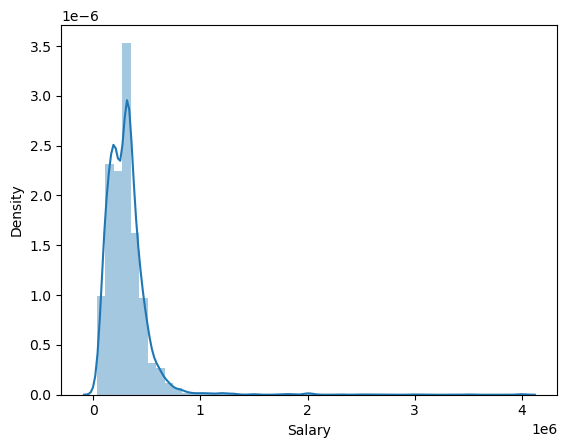


*************************************************************

Skewness of 'Salary' column: 6.451081166224832


In [14]:
num_col_uni(df,'Salary')

# 'Designation'

Description of 'Designation' column:
count                  3998
unique                  419
top       software engineer
freq                    539
Name: Designation, dtype: object

*************************************************************

NUnique values of 'Designation' column:
419

*************************************************************

Unique values of 'Designation' column:
['senior quality engineer' 'assistant manager' 'systems engineer'
 'senior software engineer' 'get' 'system engineer'
 'java software engineer' 'mechanical engineer' 'electrical engineer'
 'project engineer' 'senior php developer' 'senior systems engineer'
 'quality assurance engineer' 'qa analyst' 'network engineer'
 'product development engineer' 'associate software developer'
 'data entry operator' 'software engineer' 'developer'
 'electrical project engineer' 'programmer analyst' 'systems analyst'
 'ase' 'telecommunication engineer' 'application developer'
 'ios developer' 'executive assistant' '

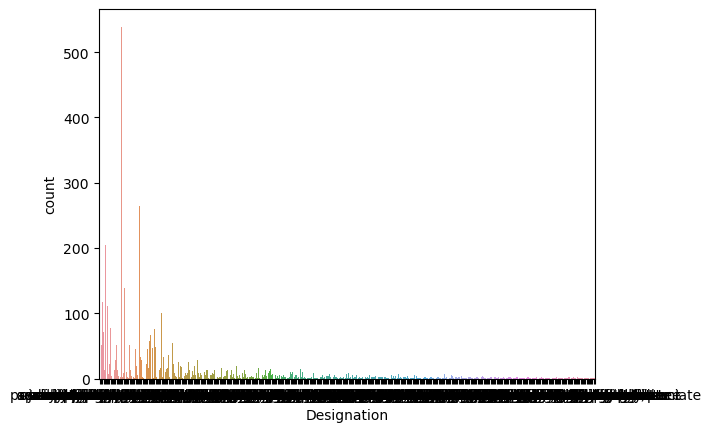


*************************************************************

Mode of 'Designation' column:
['software engineer']

*************************************************************

Most frequent value: software engineer (13.48%)

*************************************************************

Least frequent value: account manager (0.03%)

*************************************************************
values cpunt of the  Designation is  Designation
software engineer                    539
software developer                   265
system engineer                      205
programmer analyst                   139
systems engineer                     118
                                    ... 
cad drafter                            1
noc engineer                           1
human resources intern                 1
senior quality assurance engineer      1
jr. software developer                 1
Name: count, Length: 419, dtype: int64


In [15]:
cat_col_uni(df,'Designation')

# 'JobCity'

Description of 'JobCity' column:
count          3998
unique          339
top       Bangalore
freq            627
Name: JobCity, dtype: object

*************************************************************

NUnique values of 'JobCity' column:
339

*************************************************************

Unique values of 'JobCity' column:
['Bangalore' 'Indore' 'Chennai' 'Gurgaon' 'Manesar' 'Hyderabad' 'Banglore'
 'Noida' 'Kolkata' 'Pune' -1 'mohali' 'Jhansi' 'Delhi' 'Hyderabad '
 'Bangalore ' 'noida' 'delhi' 'Bhubaneswar' 'Navi Mumbai' 'Mumbai'
 'New Delhi' 'Mangalore' 'Rewari' 'Gaziabaad' 'Bhiwadi' 'Mysore' 'Rajkot'
 'Greater Noida' 'Jaipur' 'noida ' 'HYDERABAD' 'mysore' 'THANE'
 'Maharajganj' 'Thiruvananthapuram' 'Punchkula' 'Bhubaneshwar' 'Pune '
 'coimbatore' 'Dhanbad' 'Lucknow' 'Trivandrum' 'kolkata' 'mumbai'
 'Gandhi Nagar' 'Una' 'Daman and Diu' 'chennai' 'GURGOAN' 'vsakhapttnam'
 'pune' 'Nagpur' 'Bhagalpur' 'new delhi - jaisalmer' 'Coimbatore'
 'Ahmedabad' 'Kochi/Cochin' 'Ba

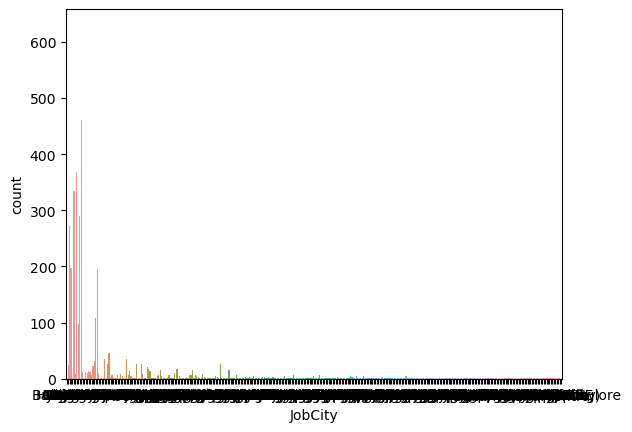


*************************************************************

Mode of 'JobCity' column:
['Bangalore']

*************************************************************

Most frequent value: Bangalore (15.68%)

*************************************************************

Least frequent value: GREATER NOIDA (0.03%)

*************************************************************
values cpunt of the  JobCity is  JobCity
Bangalore           627
-1                  461
Noida               368
Hyderabad           335
Pune                290
                   ... 
Tirunelvelli          1
Ernakulam             1
Nanded                1
Dharmapuri            1
Asifabadbanglore      1
Name: count, Length: 339, dtype: int64


In [16]:
cat_col_uni(df,"JobCity")

# 'Gender'

Description of 'Gender' column:
count     3998
unique       2
top          m
freq      3041
Name: Gender, dtype: object

*************************************************************

NUnique values of 'Gender' column:
2

*************************************************************

Unique values of 'Gender' column:
['f' 'm']

*************************************************************

Value counts of 'Gender' column:
Gender
m    3041
f     957
Name: count, dtype: int64

*************************************************************

Countplot of 'Gender' column:


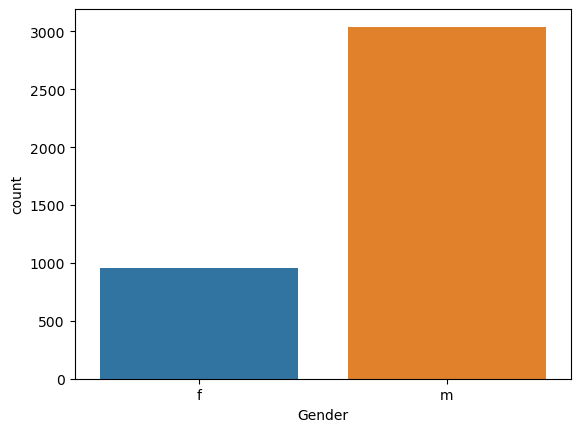


*************************************************************

Mode of 'Gender' column:
['m']

*************************************************************

Most frequent value: m (76.06%)

*************************************************************

Least frequent value: f (23.94%)

*************************************************************
values cpunt of the  Gender is  Gender
m    3041
f     957
Name: count, dtype: int64


In [17]:
cat_col_uni(df,"Gender")

In [18]:
# '10percentage'

Description of '10percentage' column:
count    3998.000000
mean       77.925443
std         9.850162
min        43.000000
25%        71.680000
50%        79.150000
75%        85.670000
max        97.760000
Name: 10percentage, dtype: float64

*************************************************************

NUnique values of '10percentage' column:
851

*************************************************************

Unique values of '10percentage' column:
[84.3  85.4  85.   85.6  78.   89.92 86.08 92.   90.   77.   88.6  81.
 83.6  60.8  81.2  69.54 85.8  65.   79.   91.2  75.67 92.5  70.   88.
 86.8  90.88 76.8  84.   64.   77.2  87.   73.   71.   91.5  52.33 66.6
 75.   91.4  59.   84.5  95.8  69.6  86.6  81.92 66.5  80.   85.2  89.25
 58.4  90.8  89.88 63.3  72.   83.   85.3  60.66 89.37 84.4  89.   86.
 70.6  93.44 76.   86.4  84.83 72.3  69.   73.33 86.16 56.   79.25 88.66
 80.8  81.16 83.5  55.6  84.6  62.   68.4  51.   79.6  63.4  86.53 76.18
 91.43 76.17 82.4  58.   90.04 60.4  74.23

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


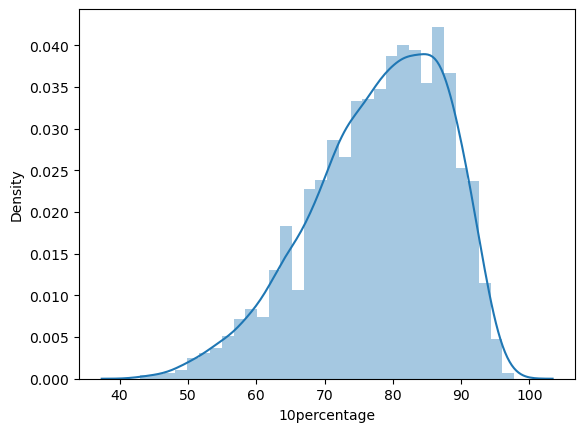


*************************************************************

Skewness of '10percentage' column: -0.5910185081648047


In [19]:
num_col_uni(df,"10percentage")

In [20]:
# 'CollegeTier'

Description of 'CollegeTier' column:
count    3998.000000
mean        1.925713
std         0.262270
min         1.000000
25%         2.000000
50%         2.000000
75%         2.000000
max         2.000000
Name: CollegeTier, dtype: float64

*************************************************************

NUnique values of 'CollegeTier' column:
2

*************************************************************

Unique values of 'CollegeTier' column:
[2 1]

*************************************************************

Value counts of 'CollegeTier' column:
CollegeTier
2    3701
1     297
Name: count, dtype: int64

*************************************************************

Countplot of 'CollegeTier' column:


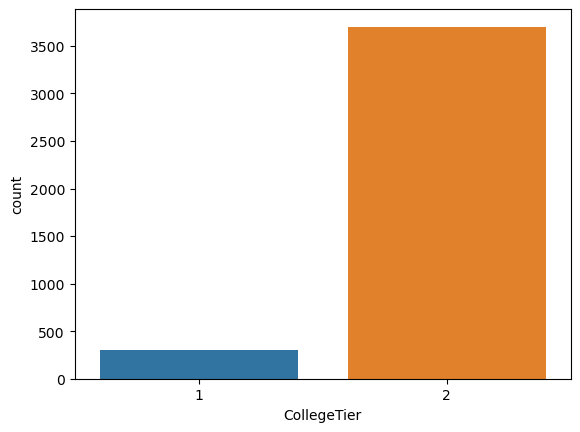


*************************************************************

Mode of 'CollegeTier' column:
[2]

*************************************************************

Most frequent value: 2 (92.57%)

*************************************************************

Least frequent value: 1 (7.43%)

*************************************************************
values cpunt of the  CollegeTier is  CollegeTier
2    3701
1     297
Name: count, dtype: int64


In [21]:
cat_col_uni(df,"CollegeTier")

In [22]:
# 'Degree'

Description of 'Degree' column:
count            3998
unique              4
top       B.Tech/B.E.
freq             3700
Name: Degree, dtype: object

*************************************************************

NUnique values of 'Degree' column:
4

*************************************************************

Unique values of 'Degree' column:
['B.Tech/B.E.' 'MCA' 'M.Tech./M.E.' 'M.Sc. (Tech.)']

*************************************************************

Value counts of 'Degree' column:
Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64

*************************************************************

Countplot of 'Degree' column:


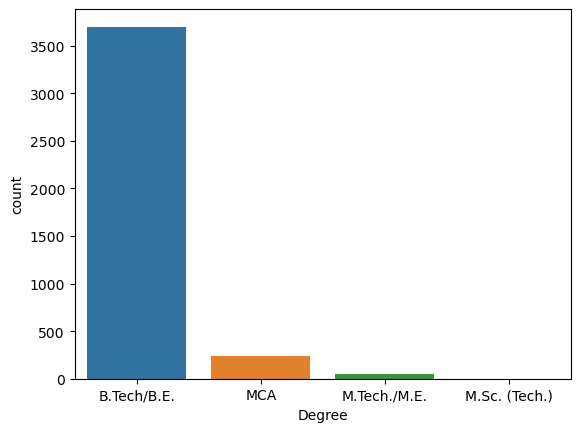


*************************************************************

Mode of 'Degree' column:
['B.Tech/B.E.']

*************************************************************

Most frequent value: B.Tech/B.E. (92.55%)

*************************************************************

Least frequent value: M.Sc. (Tech.) (0.05%)

*************************************************************
values cpunt of the  Degree is  Degree
B.Tech/B.E.      3700
MCA               243
M.Tech./M.E.       53
M.Sc. (Tech.)       2
Name: count, dtype: int64


In [23]:
cat_col_uni(df,"Degree")

In [24]:
# 'Specialization'

Description of 'Specialization' column:
count                                          3998
unique                                           46
top       electronics and communication engineering
freq                                            880
Name: Specialization, dtype: object

*************************************************************

NUnique values of 'Specialization' column:
46

*************************************************************

Unique values of 'Specialization' column:
['computer engineering' 'electronics and communication engineering'
 'information technology' 'computer science & engineering'
 'mechanical engineering' 'electronics and electrical engineering'
 'electronics & telecommunications'
 'instrumentation and control engineering' 'computer application'
 'electronics and computer engineering' 'electrical engineering'
 'applied electronics and instrumentation'
 'electronics & instrumentation eng' 'information science engineering'
 'civil engineering' 'mec

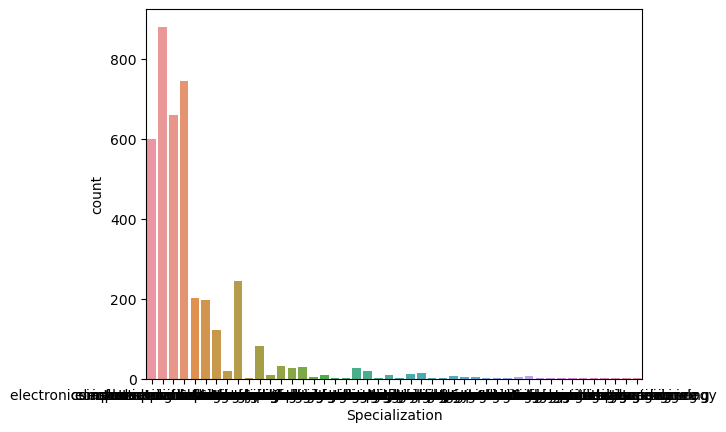


*************************************************************

Mode of 'Specialization' column:
['electronics and communication engineering']

*************************************************************

Most frequent value: electronics and communication engineering (22.01%)

*************************************************************

Least frequent value: power systems and automation (0.03%)

*************************************************************
values cpunt of the  Specialization is  Specialization
electronics and communication engineering      880
computer science & engineering                 744
information technology                         660
computer engineering                           600
computer application                           244
mechanical engineering                         201
electronics and electrical engineering         196
electronics & telecommunications               121
electrical engineering                          82
electronics & instrum

In [25]:
cat_col_uni(df,'Specialization')

In [26]:
# 'collegeGPA'

In [27]:
# 'CollegeCityID'

In [28]:
# 'CollegeCityTier'

Description of 'CollegeCityTier' column:
count    3998.000000
mean        0.300400
std         0.458489
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: CollegeCityTier, dtype: float64

*************************************************************

NUnique values of 'CollegeCityTier' column:
2

*************************************************************

Unique values of 'CollegeCityTier' column:
[0 1]

*************************************************************

Value counts of 'CollegeCityTier' column:
CollegeCityTier
0    2797
1    1201
Name: count, dtype: int64

*************************************************************

Countplot of 'CollegeCityTier' column:


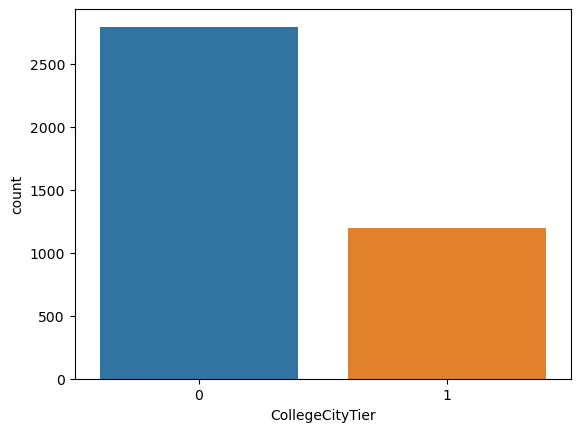


*************************************************************

Mode of 'CollegeCityTier' column:
[0]

*************************************************************

Most frequent value: 0 (69.96%)

*************************************************************

Least frequent value: 1 (30.04%)

*************************************************************
values cpunt of the  CollegeCityTier is  CollegeCityTier
0    2797
1    1201
Name: count, dtype: int64


In [29]:
cat_col_uni(df,'CollegeCityTier')

In [30]:
# 'CollegeState'

Description of 'CollegeState' column:
count              3998
unique               26
top       Uttar Pradesh
freq                915
Name: CollegeState, dtype: object

*************************************************************

NUnique values of 'CollegeState' column:
26

*************************************************************

Unique values of 'CollegeState' column:
['Andhra Pradesh' 'Madhya Pradesh' 'Uttar Pradesh' 'Delhi' 'Karnataka'
 'Tamil Nadu' 'West Bengal' 'Maharashtra' 'Haryana' 'Telangana' 'Orissa'
 'Punjab' 'Kerala' 'Gujarat' 'Rajasthan' 'Chhattisgarh' 'Uttarakhand'
 'Jammu and Kashmir' 'Jharkhand' 'Himachal Pradesh' 'Bihar' 'Assam' 'Goa'
 'Sikkim' 'Union Territory' 'Meghalaya']

*************************************************************

Value counts of 'CollegeState' column:
CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196


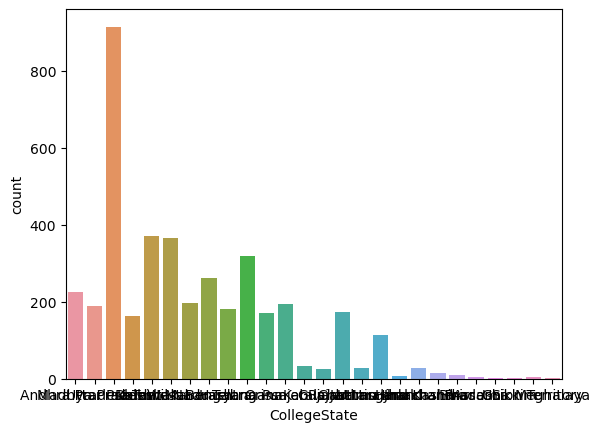


*************************************************************

Mode of 'CollegeState' column:
['Uttar Pradesh']

*************************************************************

Most frequent value: Uttar Pradesh (22.89%)

*************************************************************

Least frequent value: Goa (0.03%)

*************************************************************
values cpunt of the  CollegeState is  CollegeState
Uttar Pradesh        915
Karnataka            370
Tamil Nadu           367
Telangana            319
Maharashtra          262
Andhra Pradesh       225
West Bengal          196
Punjab               193
Madhya Pradesh       189
Haryana              180
Rajasthan            174
Orissa               172
Delhi                162
Uttarakhand          113
Kerala                33
Jharkhand             28
Chhattisgarh          27
Gujarat               24
Himachal Pradesh      16
Bihar                 10
Jammu and Kashmir      7
Assam                  5
Union Territory  

In [31]:
cat_col_uni(df,'CollegeState')

In [32]:
# 'GraduationYear'
      

Description of 'GraduationYear' column:
count    3998.000000
mean     2012.105803
std        31.857271
min         0.000000
25%      2012.000000
50%      2013.000000
75%      2014.000000
max      2017.000000
Name: GraduationYear, dtype: float64

*************************************************************

NUnique values of 'GraduationYear' column:
11

*************************************************************

Unique values of 'GraduationYear' column:
[2011 2012 2014 2016 2013 2010 2015 2009 2017    0 2007]

*************************************************************

Minimum value of 'GraduationYear' column: 0
Maximum value of 'GraduationYear' column: 2017

*************************************************************

Distribution of 'GraduationYear' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


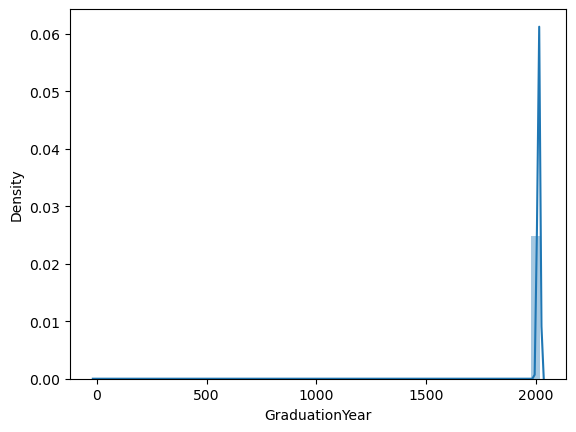


*************************************************************

Skewness of 'GraduationYear' column: -63.06806402522399


In [33]:
num_col_uni(df,'GraduationYear')

In [34]:
#  'English' 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])


Description of 'English' column:
count    3998.000000
mean      501.649075
std       104.940021
min       180.000000
25%       425.000000
50%       500.000000
75%       570.000000
max       875.000000
Name: English, dtype: float64

*************************************************************

NUnique values of 'English' column:
111

*************************************************************

Unique values of 'English' column:
[515 695 615 635 545 560 590 605 565 495 380 395 485 685 465 455 385 370
 625 575 415 535 580 475 570 430 450 510 425 555 300 505 440 525 420 640
 444 630 665 675 325 405 375 315 710 345 250 350 275 360 265 595 585 520
 500 735 765 335 490 660 355 530 365 655 730 445 720 645 650 875 534 454
 544 295 285 435 464 705 554 745 280 825 290 715 310 215 700 870 305 524
 755 790 800 205 725 780 404 770 805 180 830 795 255 324 775 394 240 225
 850 684 334]

*************************************************************

Minimum value of 'English' column: 180
Maximum val

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


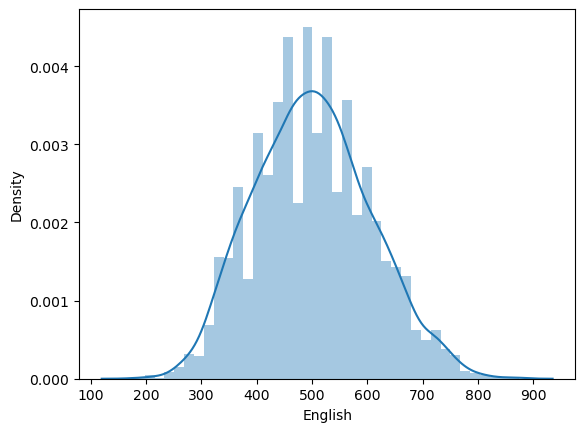


*************************************************************

Skewness of 'English' column: 0.1919970174188361


In [35]:
num_col_uni(df,'English' )

In [36]:
# 'Logical' 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Description of 'Logical' column:
count    3998.000000
mean      501.598799
std        86.783297
min       195.000000
25%       445.000000
50%       505.000000
75%       565.000000
max       795.000000
Name: Logical, dtype: float64

*************************************************************

NUnique values of 'Logical' column:
107

*************************************************************

Unique values of 'Logical' column:
[585 610 545 625 555 435 670 565 455 605 580 425 520 530 495 445 535 360
 335 510 570 375 405 485 475 525 640 595 560 340 395 415 465 505 385 460
 410 500 645 480 355 450 440 470 255 305 590 630 365 350 325 400 205 655
 295 345 390 665 515 540 680 245 620 420 575 635 554 315 615 215 370 300
 274 685 324 675 650 464 684 275 334 544 454 534 404 795 285 715 700 674
 690 695 394 270 705 310 490 330 280 735 380 290 265 240 195 235 660]

*************************************************************

Minimum value of 'Logical' column: 195
Maximum value of 'Logical' c

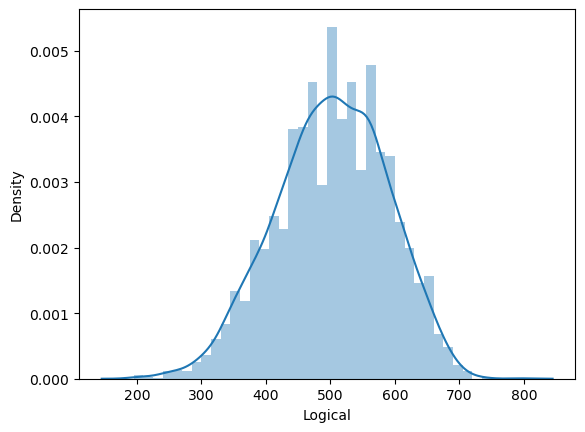


*************************************************************

Skewness of 'Logical' column: -0.21660181091305136


In [37]:
num_col_uni(df,'Logical' )

In [38]:
# 'Quant'

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])


Description of 'Quant' column:
count    3998.000000
mean      513.378189
std       122.302332
min       120.000000
25%       430.000000
50%       515.000000
75%       595.000000
max       900.000000
Name: Quant, dtype: float64

*************************************************************

NUnique values of 'Quant' column:
138

*************************************************************

Unique values of 'Quant' column:
[525 780 370 625 465 620 380 590 530 545 565 715 470 645 355 515 435 445
 485 270 630 575 405 605 385 695 450 295 430 415 635 475 460 825 500 455
 554 595 495 665 250 310 325 390 510 535 340 440 705 534 400 395 570 750
 330 320 454 365 615 505 425 235 210 585 810 555 735 560 524 690 870 765
 675 520 655 305 725 840 650 375 720 265 280 464 404 800 680 260 674 760
 345 335 165 685 544 215 180 795 200 860 334 285 514 195 494 214 275 315
 324 175 684 225 740 805 444 410 135 255 220 755 855 145 245 885 120 900
 794 775 745 504 820 150 710 190 185 155 580 394]

************

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


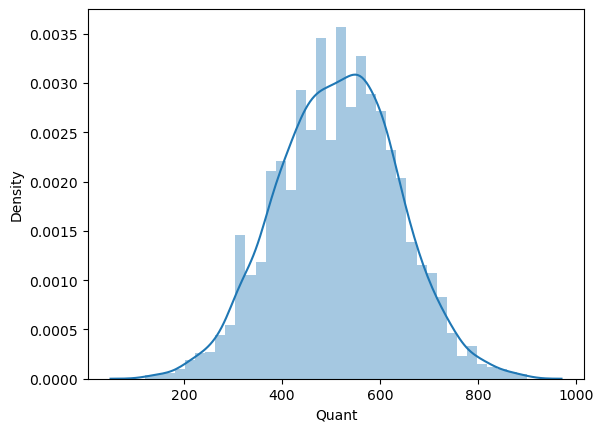


*************************************************************

Skewness of 'Quant' column: -0.01939903459277611


In [39]:
num_col_uni(df,'Quant' )

In [40]:
#  'Domain' 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Description of 'Domain' column:
count    3998.000000
mean        0.510490
std         0.468671
min        -1.000000
25%         0.342315
50%         0.622643
75%         0.842248
max         0.999910
Name: Domain, dtype: float64

*************************************************************

NUnique values of 'Domain' column:
243

*************************************************************

Unique values of 'Domain' column:
[ 0.63597876  0.96060325  0.45087658  0.97439611  0.12450207 -1.
  0.35653649  0.8295846   0.69447933  0.49359639  0.76567358  0.9682375
  0.22948175  0.53838689  0.30840058  0.91139528  0.56326782  0.86468541
  0.64938971  0.74475835  0.88412251  0.88162007  0.20739217  0.48674701
  0.67074315  0.62264292  0.41383826  0.52592258  0.73579571  0.13044174
  0.23780284  0.11213944  0.37755142  0.06696071  0.08005528  0.92564577
  0.84312373  0.91686996  0.78330354  0.60005718  0.79293628  0.79358061
  0.16563309  0.75537512  0.99990456  0.33878635  0.91077016  0.9820

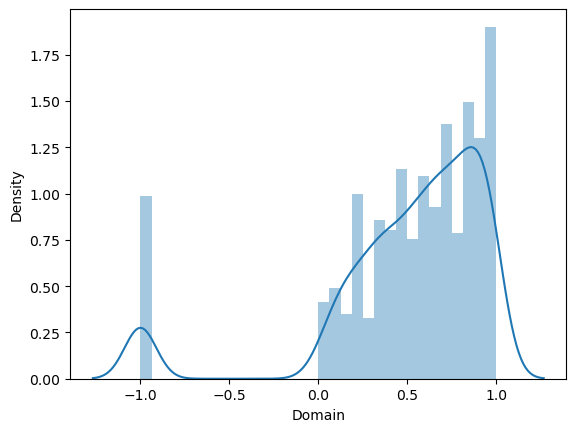


*************************************************************

Skewness of 'Domain' column: -1.9221455634359381


In [41]:
num_col_uni(df,'Domain' )

In [42]:
# 'ComputerProgramming'
       

Description of 'ComputerProgramming' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


count    3998.000000
mean      353.102801
std       205.355519
min        -1.000000
25%       295.000000
50%       415.000000
75%       495.000000
max       840.000000
Name: ComputerProgramming, dtype: float64

*************************************************************

NUnique values of 'ComputerProgramming' column:
79

*************************************************************

Unique values of 'ComputerProgramming' column:
[445  -1 395 615 645 405 735 385 485 605 495 355 515 545 425 525 455 475
 565 535 335 345 465 415 435 155 375 555 305 315 804 285 575 505 195 225
 595 275 334 365 685 655 625 585 665 325 235 255 205 494 695 635 215 464
 295 394 245 715 265 135 105 524 165 175 125 675 454 745 185 214 145 544
 725 840 404 755 705 115 554]

*************************************************************

Minimum value of 'ComputerProgramming' column: -1
Maximum value of 'ComputerProgramming' column: 840

*************************************************************

Distribution 

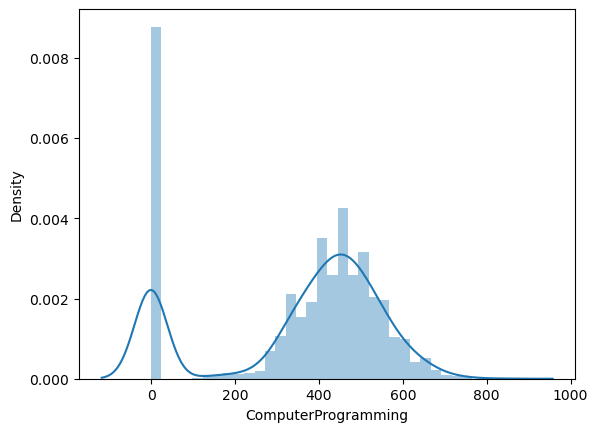


*************************************************************

Skewness of 'ComputerProgramming' column: -0.7781056485649357


In [43]:
num_col_uni(df,'ComputerProgramming' )

In [44]:
# 'ElectronicsAndSemicon' 

Description of 'ElectronicsAndSemicon' column:
count    3998.000000
mean       95.328414
std       158.241218
min        -1.000000
25%        -1.000000
50%        -1.000000
75%       233.000000
max       612.000000
Name: ElectronicsAndSemicon, dtype: float64

*************************************************************

NUnique values of 'ElectronicsAndSemicon' column:
29

*************************************************************

Unique values of 'ElectronicsAndSemicon' column:
[ -1 466 233 366 324 266 333 356 420 260 228 388 300 292 433 196 200 164
 400 484 500 452 516 166 533 566 612 133 548]

*************************************************************

Minimum value of 'ElectronicsAndSemicon' column: -1
Maximum value of 'ElectronicsAndSemicon' column: 612

*************************************************************

Distribution of 'ElectronicsAndSemicon' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


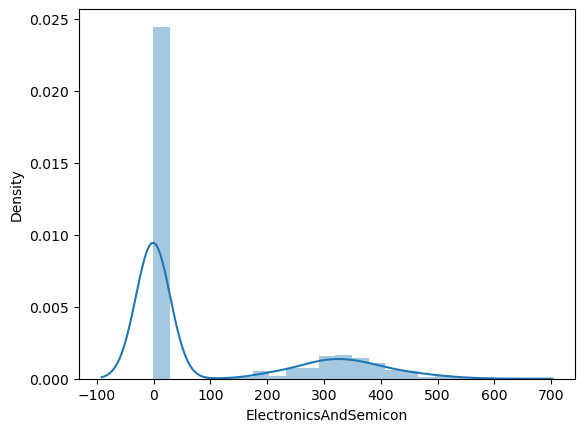


*************************************************************

Skewness of 'ElectronicsAndSemicon' column: 1.1959748726431938


In [45]:
num_col_uni(df,'ElectronicsAndSemicon' )

In [46]:
# 'ComputerScience' 

Description of 'ComputerScience' column:
count    3998.000000
mean       90.742371
std       175.273083
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       715.000000
Name: ComputerScience, dtype: float64

*************************************************************

NUnique values of 'ComputerScience' column:
20

*************************************************************

Unique values of 'ComputerScience' column:
[ -1 407 346 376 500 438 315 253 469 192 530 284 223 561 684 592 623 653
 130 715]

*************************************************************

Minimum value of 'ComputerScience' column: -1
Maximum value of 'ComputerScience' column: 715

*************************************************************

Distribution of 'ComputerScience' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


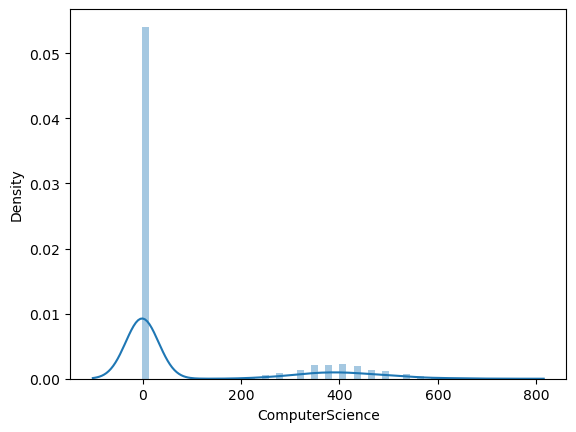


*************************************************************

Skewness of 'ComputerScience' column: 1.529520866328104


In [47]:
num_col_uni(df,'ComputerScience'  )

In [48]:
# 'MechanicalEngg'
      

Description of 'MechanicalEngg' column:
count    3998.000000
mean       22.974737
std        98.123311
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       623.000000
Name: MechanicalEngg, dtype: float64

*************************************************************

NUnique values of 'MechanicalEngg' column:
42

*************************************************************

Unique values of 'MechanicalEngg' column:
[ -1 469 313 286 253 366 446 206 438 332 393 383 260 561 553 376 526 284
 409 473 340 223 420 538 346 435 512 407 580 280 358 500 315 254 616 564
 233 306 461 180 606 623]

*************************************************************

Minimum value of 'MechanicalEngg' column: -1
Maximum value of 'MechanicalEngg' column: 623

*************************************************************

Distribution of 'MechanicalEngg' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


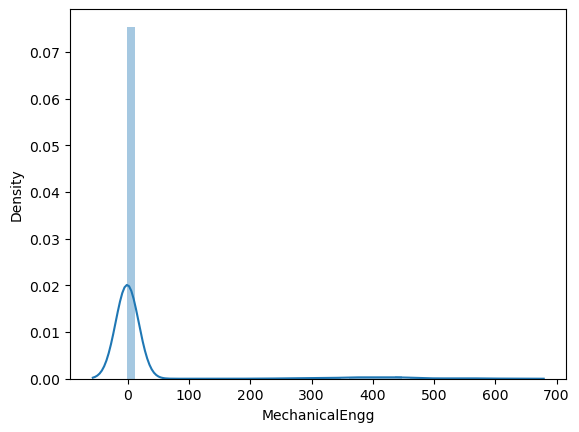


*************************************************************

Skewness of 'MechanicalEngg' column: 4.029563440339185


In [49]:
num_col_uni(df,'MechanicalEngg'  )

In [50]:
# 'ElectricalEngg'

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Description of 'ElectricalEngg' column:
count    3998.000000
mean       16.478739
std        87.585634
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       676.000000
Name: ElectricalEngg, dtype: float64

*************************************************************

NUnique values of 'ElectricalEngg' column:
31

*************************************************************

Unique values of 'ElectricalEngg' column:
[ -1 484 606 393 500 553 580 446 420 324 388 356 313 633 516 366 612 452
 526 548 228 433 473 676 292 660 411 286 340 260 206]

*************************************************************

Minimum value of 'ElectricalEngg' column: -1
Maximum value of 'ElectricalEngg' column: 676

*************************************************************

Distribution of 'ElectricalEngg' column:


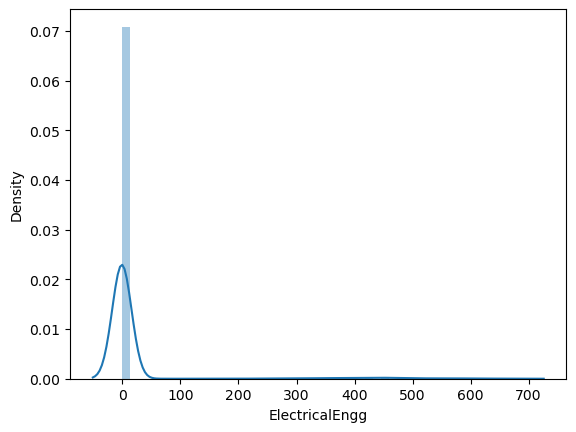


*************************************************************

Skewness of 'ElectricalEngg' column: 5.060407240676985


In [51]:
num_col_uni(df,'ElectricalEngg'  )

In [52]:
#  'TelecomEngg' 

Description of 'TelecomEngg' column:
count    3998.000000
mean       31.851176
std       104.852845
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       548.000000
Name: TelecomEngg, dtype: float64

*************************************************************

NUnique values of 'TelecomEngg' column:
26

*************************************************************

Unique values of 'TelecomEngg' column:
[ -1 206 313 420 260 393 366 446 324 340 286 473 484 452 233 292 526 153
 516 356 548 228 196 164 388 500]

*************************************************************

Minimum value of 'TelecomEngg' column: -1
Maximum value of 'TelecomEngg' column: 548

*************************************************************

Distribution of 'TelecomEngg' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


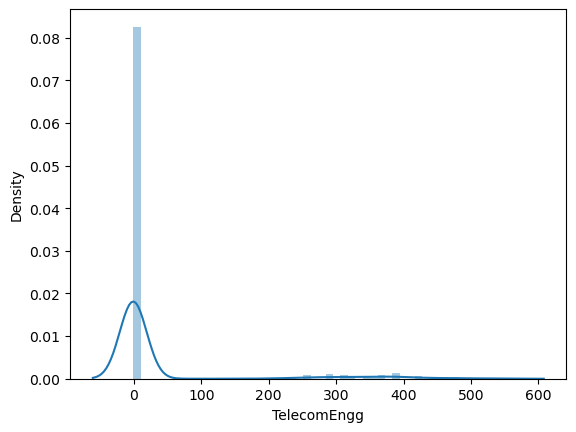


*************************************************************

Skewness of 'TelecomEngg' column: 3.041260613001428


In [53]:
num_col_uni(df,'TelecomEngg'  )

In [54]:
# 'CivilEngg' 

Description of 'CivilEngg' column:
count    3998.000000
mean        2.683842
std        36.658505
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       516.000000
Name: CivilEngg, dtype: float64

*************************************************************

NUnique values of 'CivilEngg' column:
23

*************************************************************

Unique values of 'CivilEngg' column:
[ -1 320 400 388 260 440 356 292 500 200 300 452 322 340 166 277 516 380
 433 280 420 460 480]

*************************************************************

Minimum value of 'CivilEngg' column: -1
Maximum value of 'CivilEngg' column: 516

*************************************************************

Distribution of 'CivilEngg' column:


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


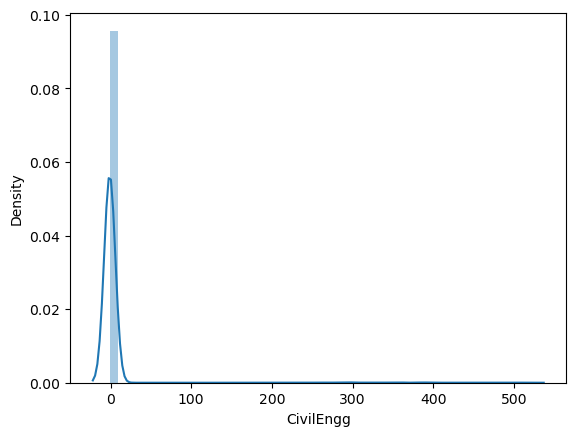


*************************************************************

Skewness of 'CivilEngg' column: 10.315681229498226


In [55]:
num_col_uni(df,'CivilEngg'  )

In [56]:
# 'conscientiousness'

Description of 'conscientiousness' column:
count    3998.000000
mean       -0.037831
std         1.028666
min        -4.126700
25%        -0.713525
50%         0.046400
75%         0.702700
max         1.995300
Name: conscientiousness, dtype: float64

*************************************************************

NUnique values of 'conscientiousness' column:
141

*************************************************************

Unique values of 'conscientiousness' column:
[ 0.9737 -0.7335  0.2718  0.0464 -0.881  -0.3027  1.7081 -0.0154 -0.159
 -1.308  -2.272   0.1282  0.3555  0.7027  1.7465  1.1336  0.8463  0.8192
 -0.1082 -1.0355 -0.4463  0.4155  0.99   -3.1994 -0.4173  1.5644 -0.4854
 -1.0208  0.3941 -0.8772  0.51   -0.5899 -2.5039  1.2828  0.335  -0.3014
  1.8517 -1.1644 -2.2351  0.6646 -0.2628 -1.8825 -1.4517  0.5591  1.4208
 -0.7264 -0.5116 -1.7389  0.2009 -0.0696 -2.5811 -2.3134  1.2772 -2.8879
  1.4374 -1.3447  0.1623  1.7156 -1.9629 -2.457   1.9953 -2.0262 -2.1175
 -2.7443 -1.4606

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


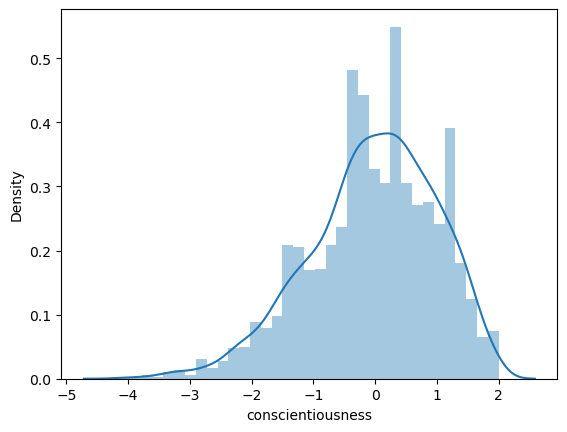


*************************************************************

Skewness of 'conscientiousness' column: -0.5270033403119503


In [57]:
num_col_uni(df,'conscientiousness'  )

In [58]:
# 'agreeableness' 

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Description of 'agreeableness' column:
count    3998.000000
mean        0.146496
std         0.941782
min        -5.781600
25%        -0.287100
50%         0.212400
75%         0.812800
max         1.904800
Name: agreeableness, dtype: float64

*************************************************************

NUnique values of 'agreeableness' column:
149

*************************************************************

Unique values of 'agreeableness' column:
[ 0.8128  0.3789  1.7109  0.3448 -0.2793 -0.6201 -0.1054  1.2114  0.5454
  1.1248  0.0328  0.7119  1.9048  1.0449  0.2668  0.9688 -0.5913 -2.1186
  0.8027  1.2028  0.1888  1.3779 -1.8393  0.6568 -0.4536 -0.5213  0.2124
  1.2808 -1.1196  0.2578 -2.4516  1.7488 -0.1206  0.0924 -0.0842 -0.4353
  1.5444 -0.9531 -2.6847 -0.1232 -3.7836  1.4368  0.8784 -1.4526  0.0459
 -0.2871  1.0858  1.7878 -0.7866  0.8229 -1.6191 -1.2861  0.6178 -0.2012
  0.5008 -0.9033  1.5538 -4.2831  0.8518  0.1498 -1.9953 -1.3713 -2.9314
 -1.2153 -0.7473 -0.5523 -1.059

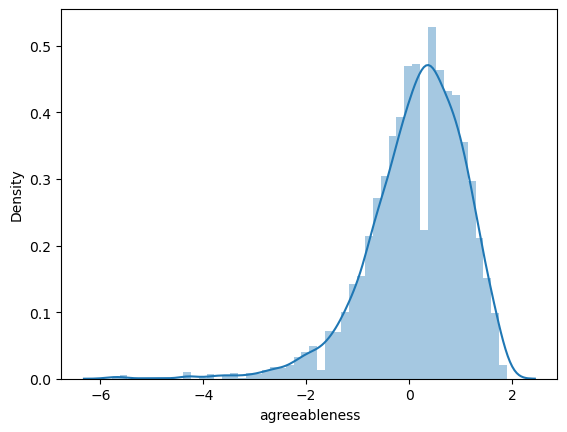


*************************************************************

Skewness of 'agreeableness' column: -1.2049152493551414


In [59]:
num_col_uni(df,'agreeableness' )

In [60]:
# 'extraversion' 

Description of 'extraversion' column:
count    3998.000000
mean        0.002763
std         0.951471
min        -4.600900
25%        -0.604800
50%         0.091400
75%         0.672000
max         2.535400
Name: extraversion, dtype: float64

*************************************************************

NUnique values of 'extraversion' column:
154

*************************************************************

Unique values of 'extraversion' column:
[ 0.5269  1.2396  0.1637 -0.344  -1.0697 -2.2954 -1.0379  0.01   -0.6048
 -0.9122  0.0914  0.8171 -0.7585 -0.598   0.672   0.7785 -1.0659  1.3933
 -0.2714 -1.3599 -1.9881  0.1357 -0.9245 -1.7954  0.0552 -0.0537  1.0859
  0.3174  2.1129  0.4711  0.6248  0.2366 -0.5349 -0.4511 -0.6343 -0.7794
  0.3817  1.8331 -2.2308 -0.6582 -0.2974 -2.6028 -2.4491 -1.2196  2.1617
 -0.1988 -0.4891  0.9322 -1.2148  1.7007  1.1437 -0.1437  1.8543  1.547
  0.8809 -1.6807  0.7083  0.5994  1.1074 -1.5776  0.9623 -1.8344 -1.5051
 -0.1626  0.926  -3.2176 -1.3733  1.

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


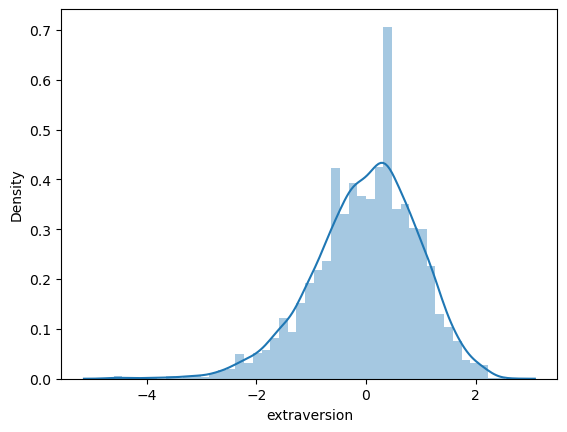


*************************************************************

Skewness of 'extraversion' column: -0.5232667810368843


In [61]:
num_col_uni(df,'extraversion' )

In [62]:
# 'nueroticism'
       

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Description of 'nueroticism' column:
count    3998.000000
mean       -0.169033
std         1.007580
min        -2.643000
25%        -0.868200
50%        -0.234400
75%         0.526200
max         3.352500
Name: nueroticism, dtype: float64

*************************************************************

NUnique values of 'nueroticism' column:
217

*************************************************************

Unique values of 'nueroticism' column:
[ 1.3549  -0.1076  -0.8682  -0.4078   0.09163 -0.7415  -2.0092   0.1459
  0.9066   0.1798  -0.995   -0.2902  -0.6147  -1.6289  -0.2344   0.06223
  0.7798  -0.4879   0.5323   1.8249  -0.3612   0.0623  -1.2303  -1.5021
  1.1601  -1.8824  -0.735    0.2727  -2.1998  -1.2486  -1.1218   0.2973
  1.7074   0.26793 -2.2879   1.0024   0.653   -0.4821  -0.6428  -0.349
  1.5404   0.3995   0.6498   1.794    0.0192   1.0333   0.4148   0.8848
 -0.7603   0.88483 -0.5253   1.2869   1.4724  -0.8778  -0.1727   0.0035
 -1.1128   1.6672   0.64983  1.1199  -2.3895  

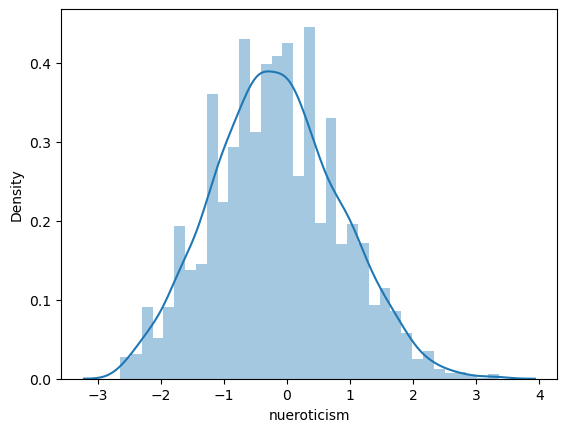


*************************************************************

Skewness of 'nueroticism' column: 0.16570968491563792


In [63]:
num_col_uni(df,'nueroticism')

# 'openess_to_experience'

Description of 'openess_to_experience' column:
count    3998.000000
mean       -0.138110
std         1.008075
min        -7.375700
25%        -0.669200
50%        -0.094300
75%         0.502400
max         1.822400
Name: openess_to_experience, dtype: float64

*************************************************************

NUnique values of 'openess_to_experience' column:
142

*************************************************************

Unique values of 'openess_to_experience' column:
[-0.4455  0.8637  0.6721 -0.9194 -0.1295 -0.8608 -1.0872  1.247  -0.2859
  0.0973  0.0284 -1.2354  1.2528  1.4386  0.3444 -1.3539 -2.7769 -5.0763
 -0.6692 -0.2875  1.1343 -0.0943 -0.7615  0.2889 -0.4776  1.0554  1.8224
  0.6603 -1.4356 -1.359  -3.1602  0.1864  0.5024 -1.244  -0.1543 -0.6035
 -5.477  -1.8189 -2.3937  0.3049  0.8183  0.4805  1.6302 -2.2021  1.2923
  0.9763 -2.9731 -1.0524 -1.6273  1.6082 -5.2679 -0.169  -1.0774 -3.9605
 -0.0506 -0.5245 -1.8673 -0.8799 -0.9984  0.5419 -4.5015 -2.1833 -2.3415

C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1712960893.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column_name])
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


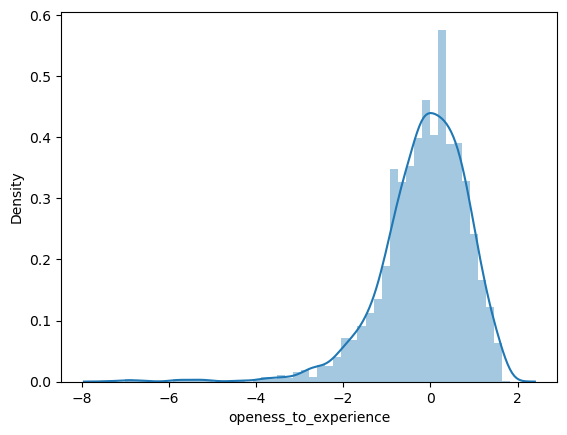


*************************************************************

Skewness of 'openess_to_experience' column: -1.5069620137292778


In [64]:
num_col_uni(df,'openess_to_experience')

In [65]:
df["doj_year"]= df["DOJ"].dt.year

In [66]:
df["dob_year"]= df["DOB"].dt.year

# detection of outliers with the boxplot

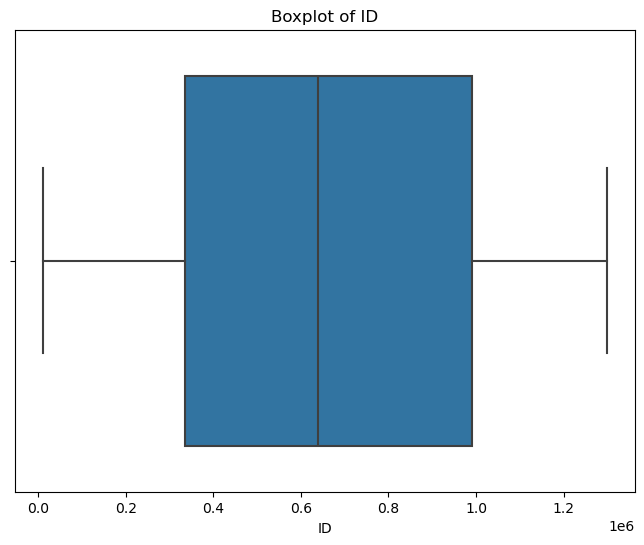

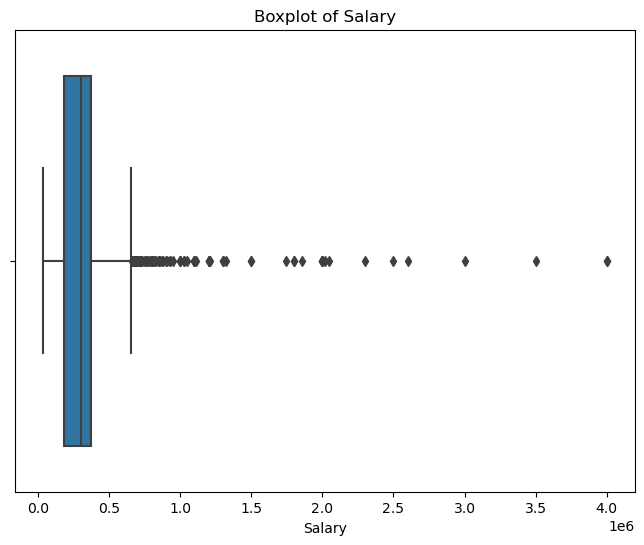

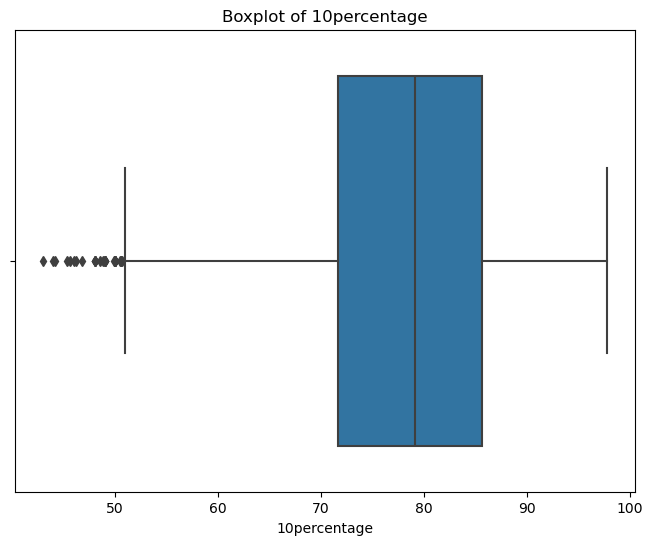

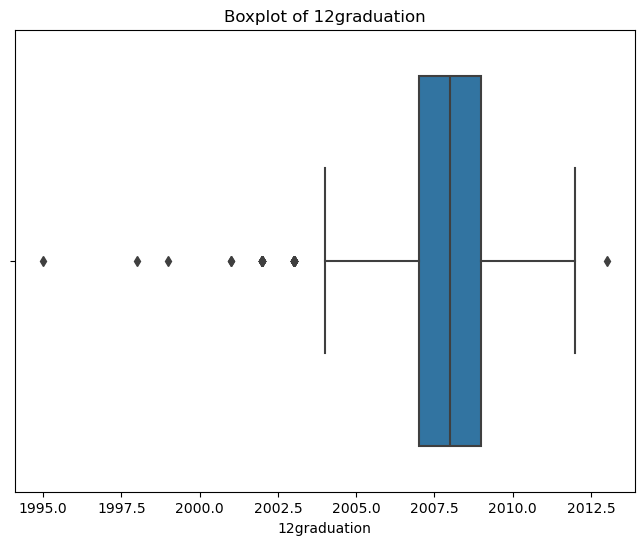

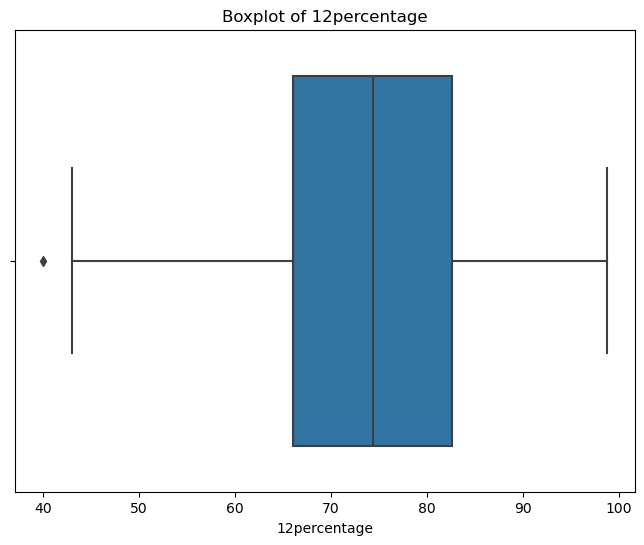

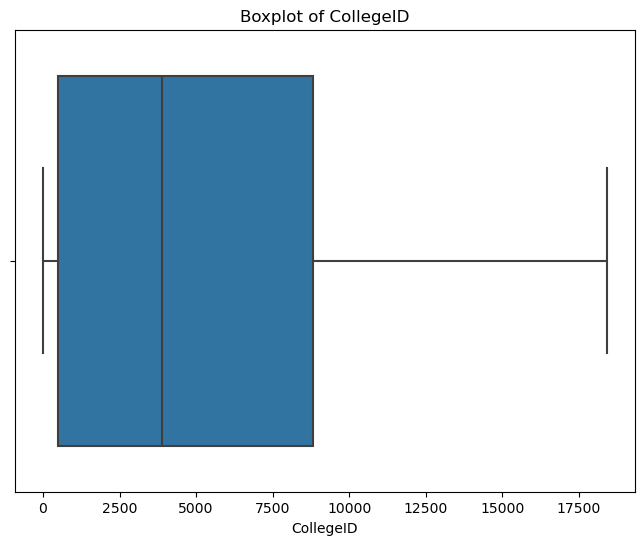

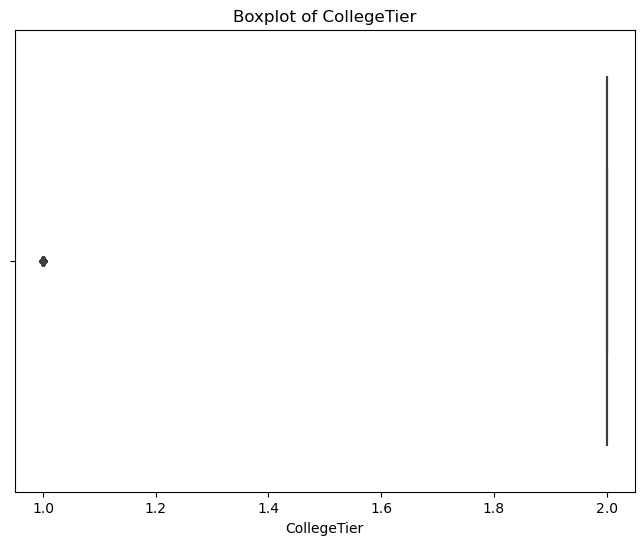

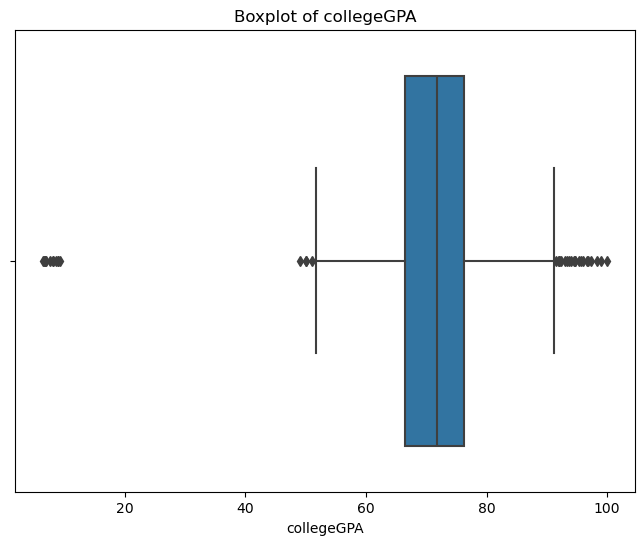

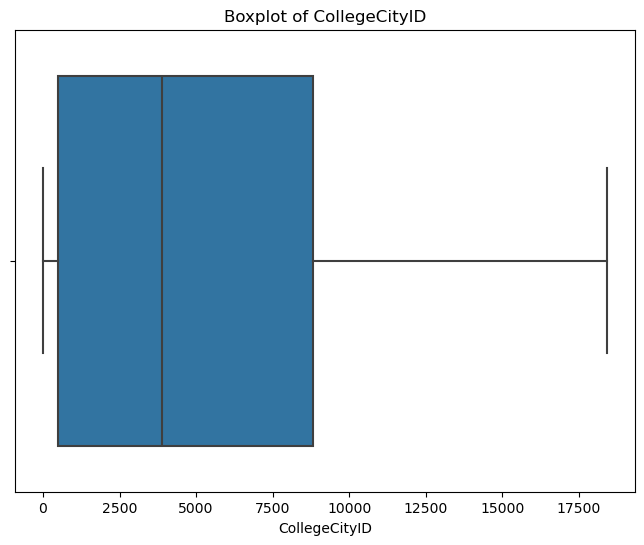

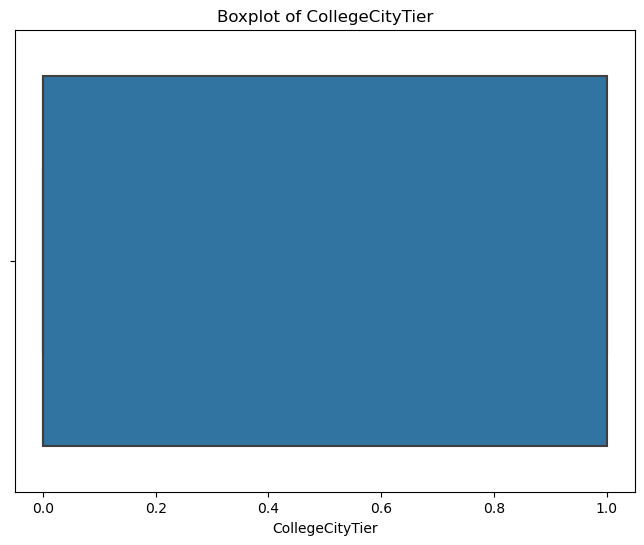

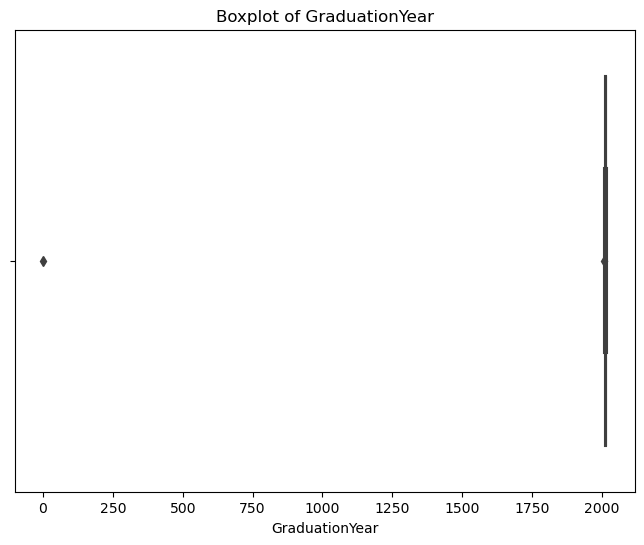

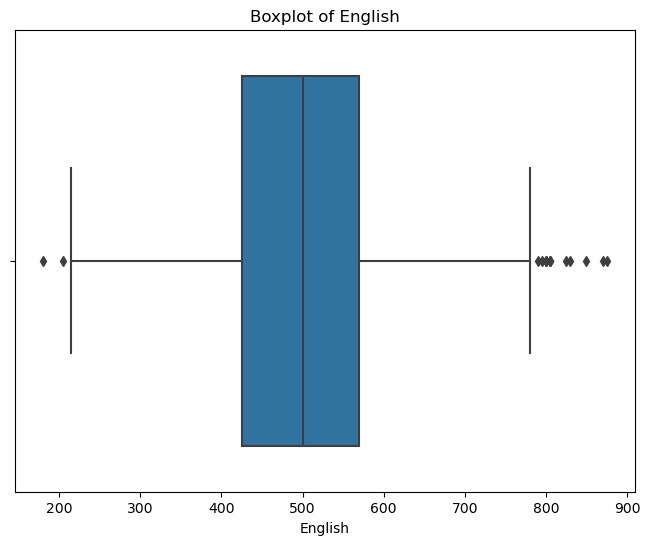

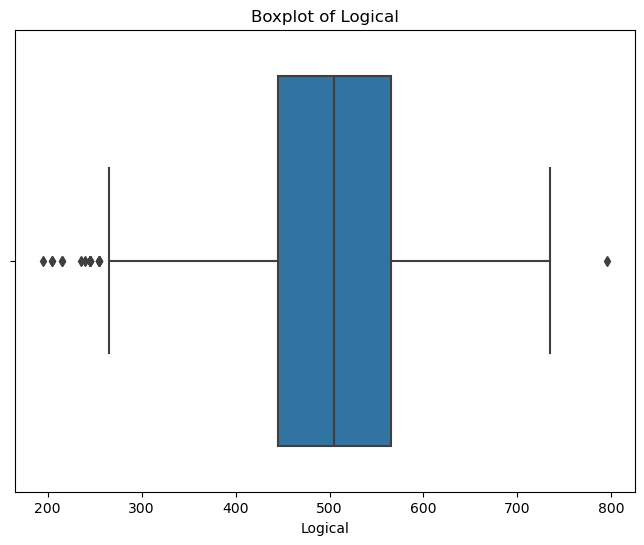

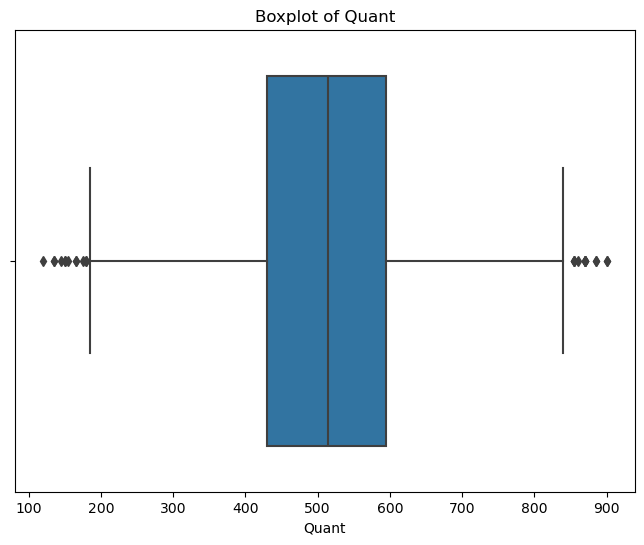

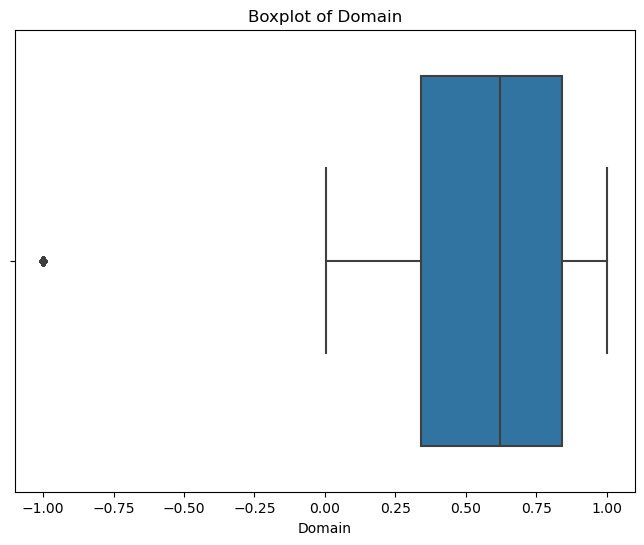

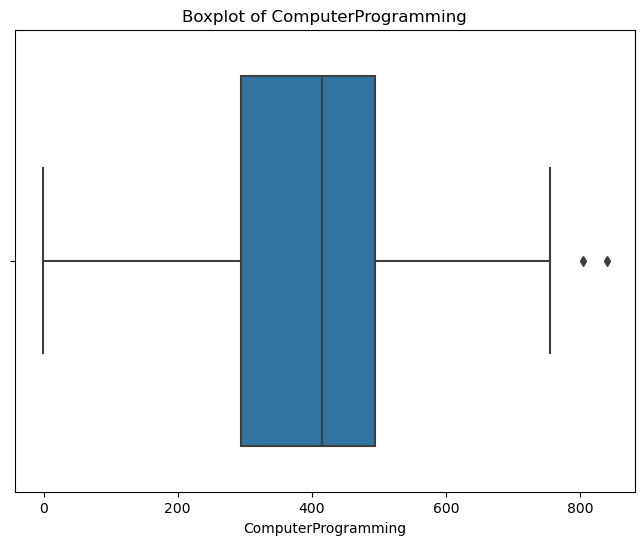

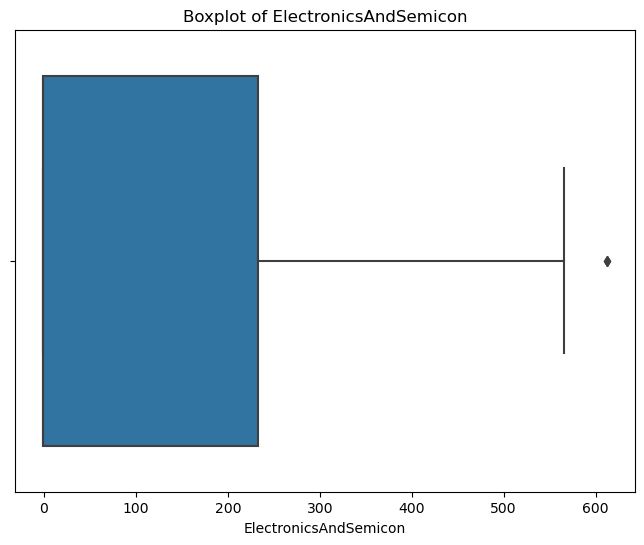

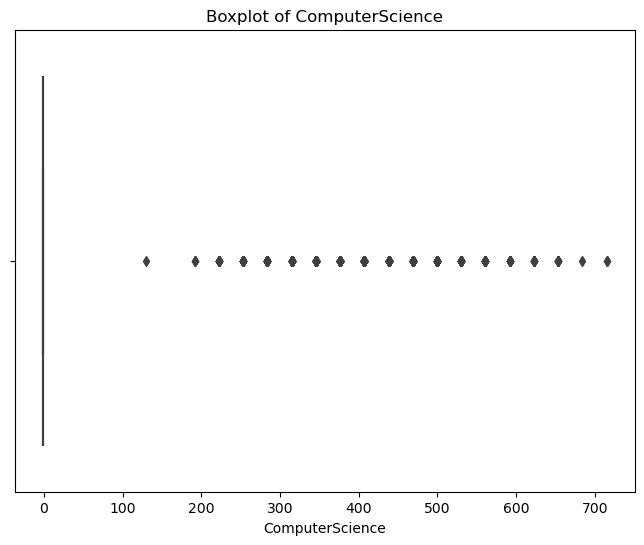

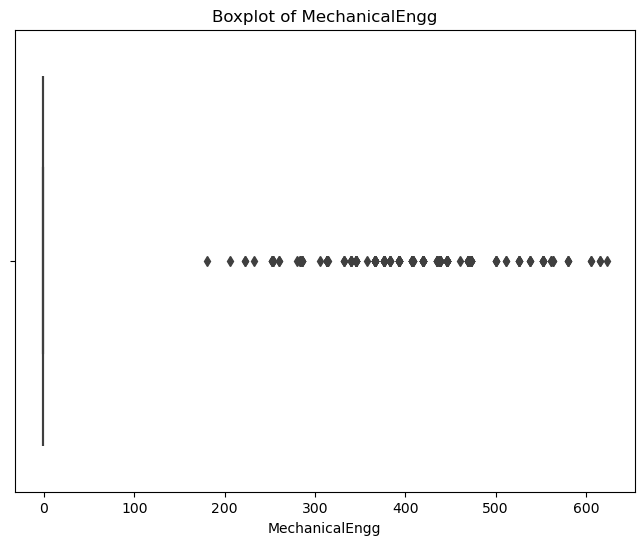

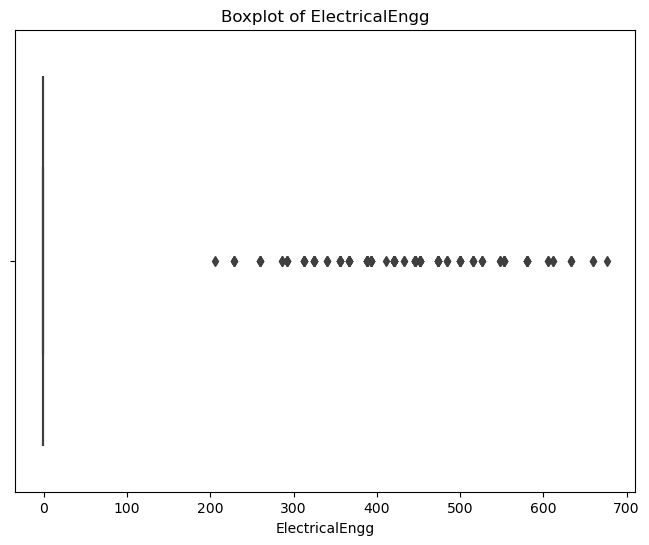

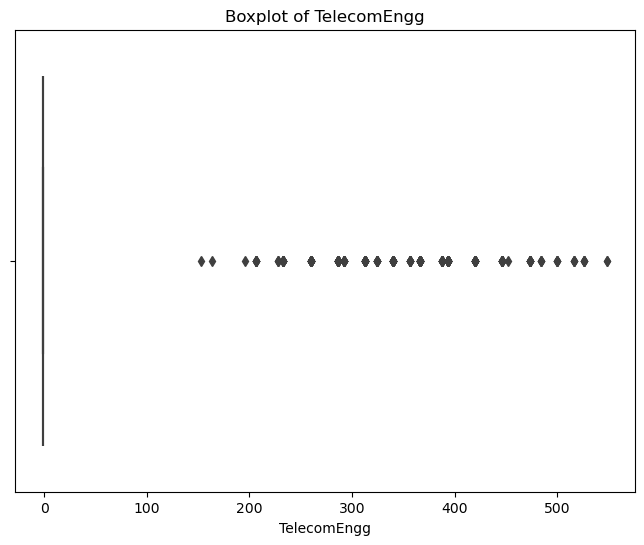

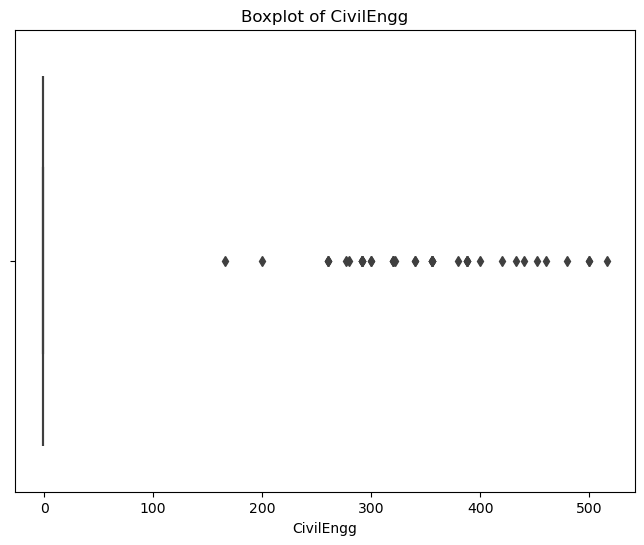

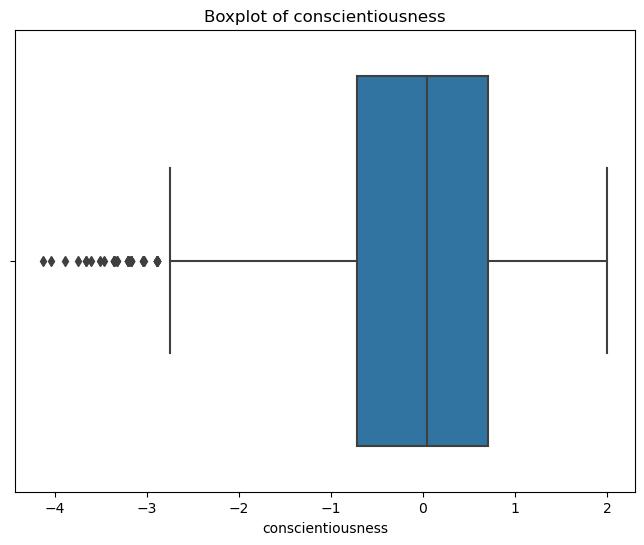

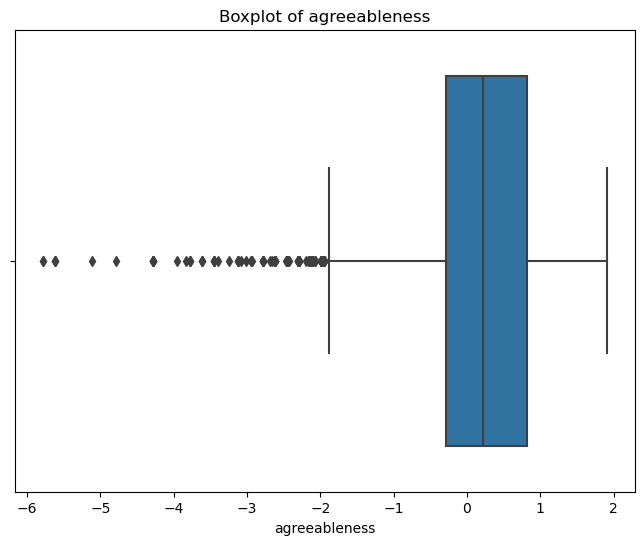

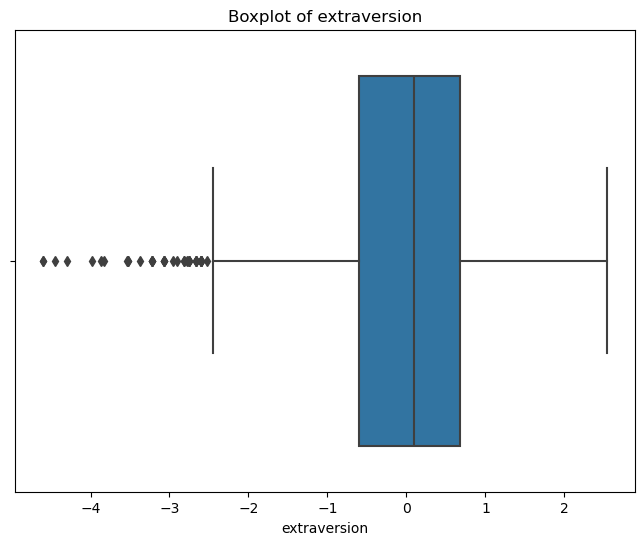

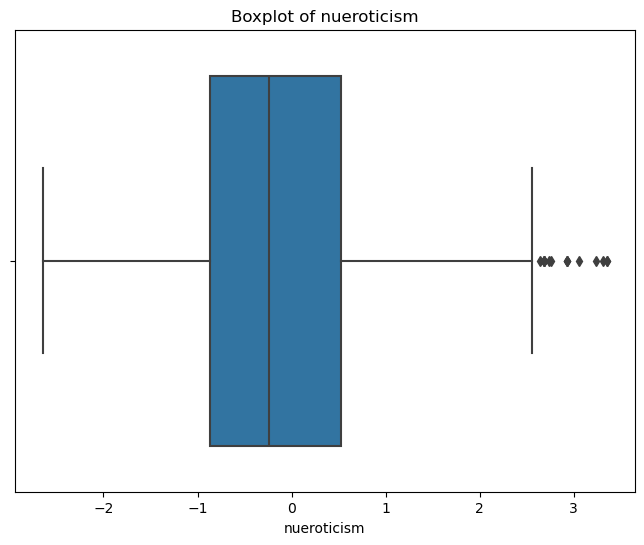

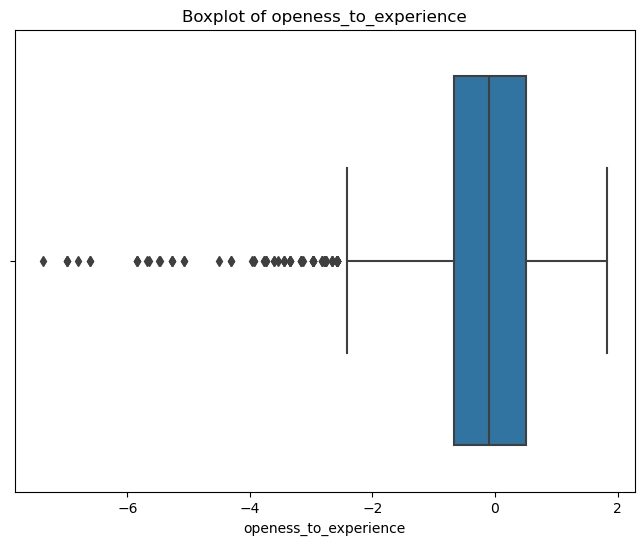

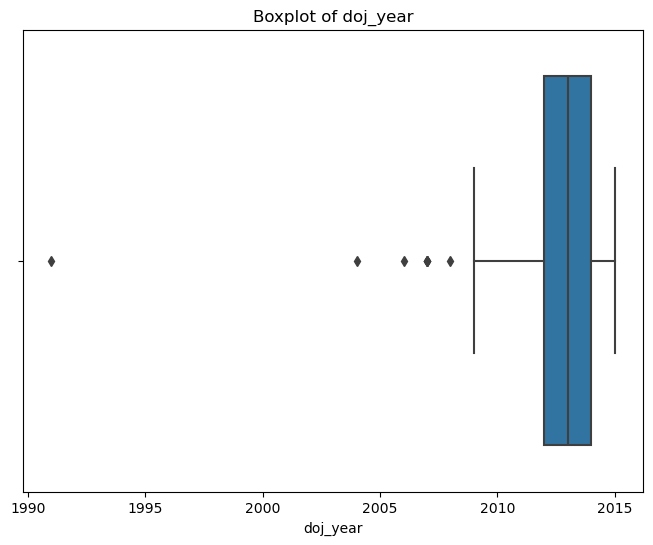

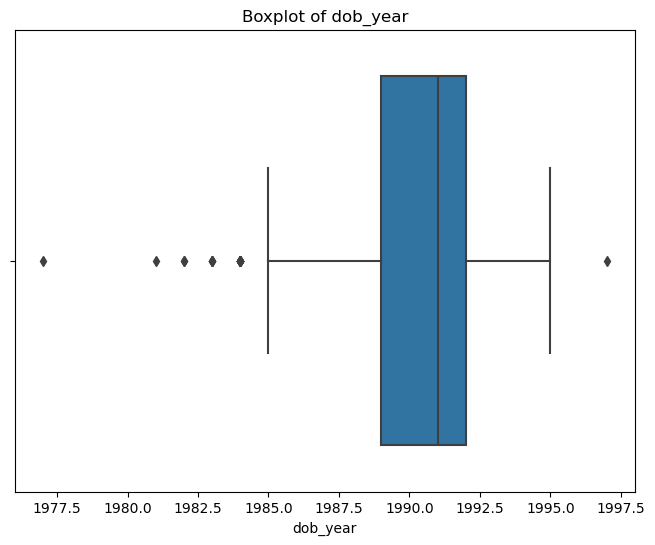

In [67]:
num_col = df.select_dtypes(include='number').columns




for i in num_col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()





In [68]:
num_col

Index(['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA', 'CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'doj_year', 'dob_year'],
      dtype='object')

# capping the outlers 

In [69]:


def iqr(column):
    q1 = np.quantile(column, 0.25)
    q3 = np.quantile(column, 0.75)
    rang = q3 - q1
    right = q3 + rang * 1.5
    left = q1 - rang * 1.5
    
    column[column > right] = right
    column[column < left] = left

    return column




In [70]:
for i in num_col:
    
    df[i] = iqr(df[i])




C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\639008634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\639008634.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column < left] = left
C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\639008634.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[column > right] = right
C:\Users\jee

# box plots after the outliers capping

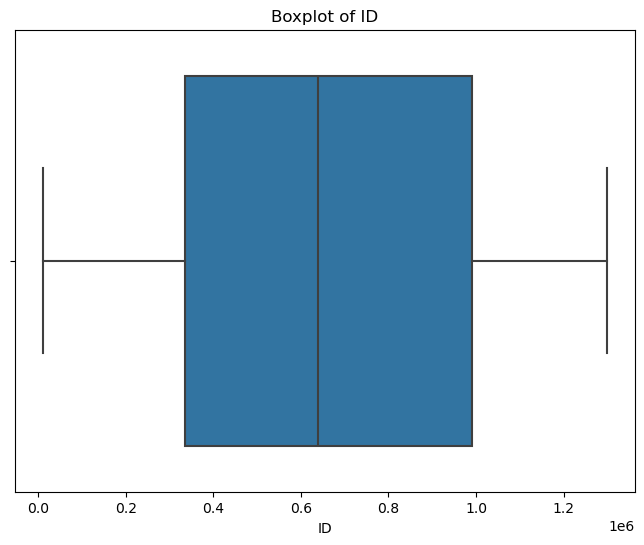

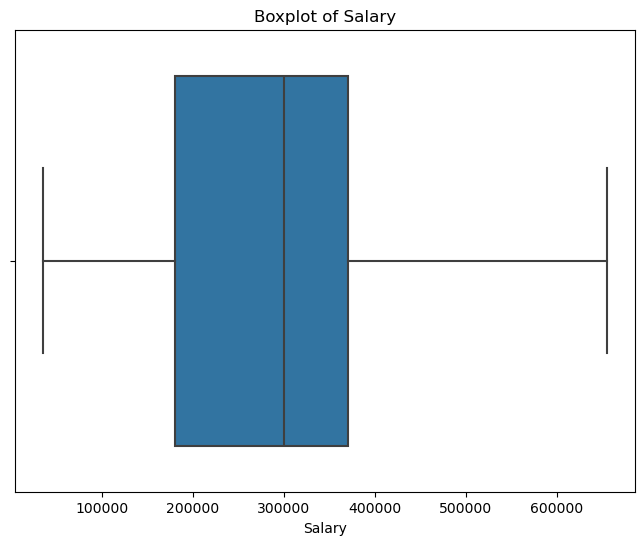

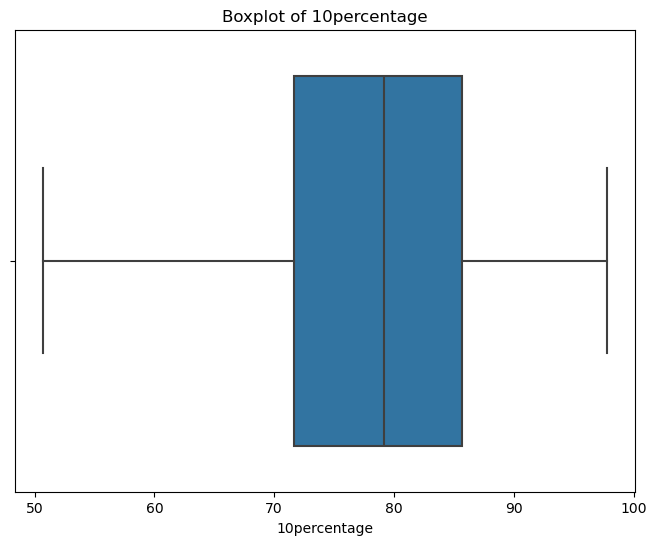

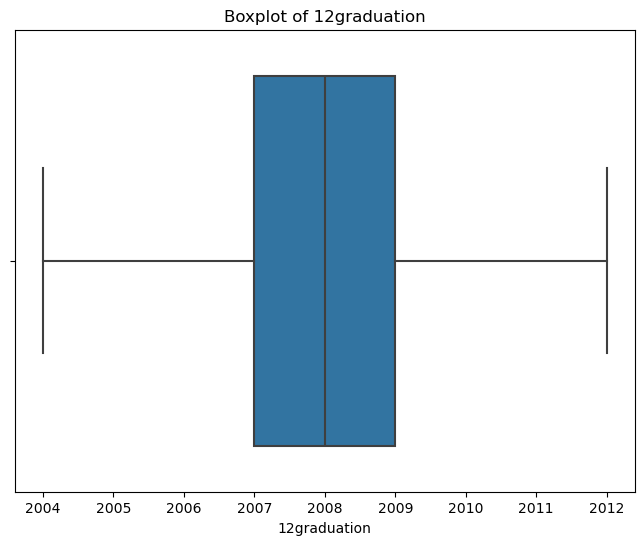

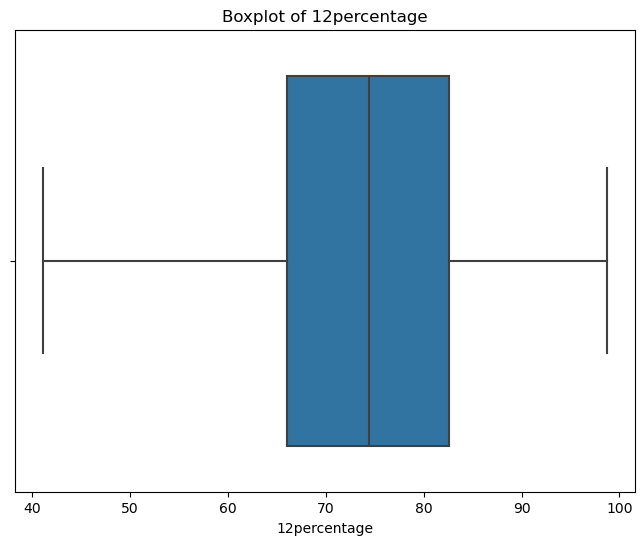

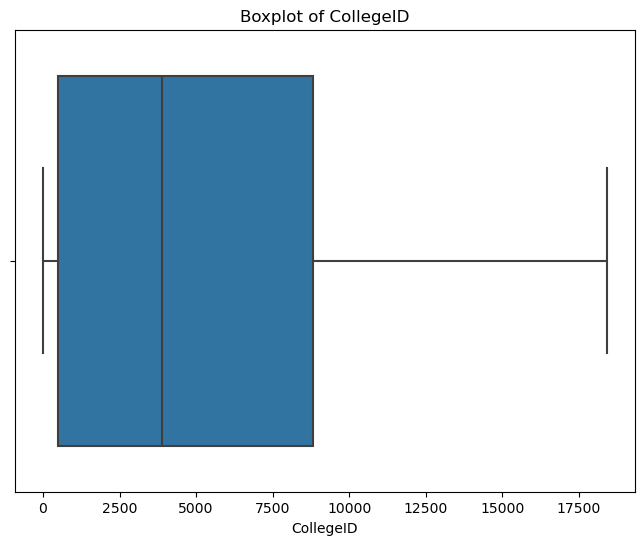

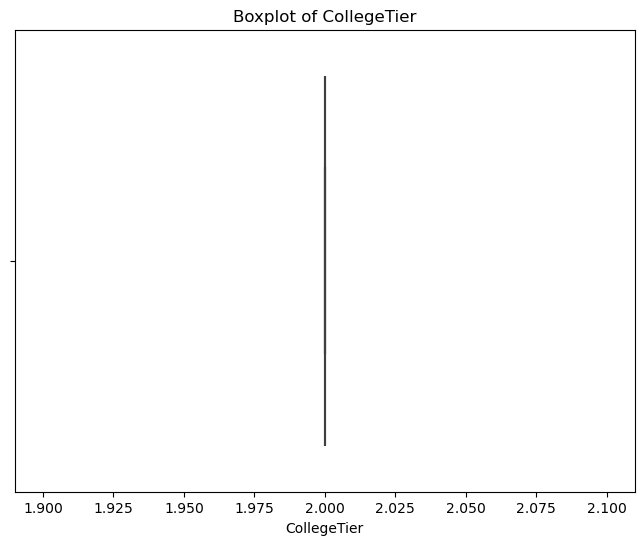

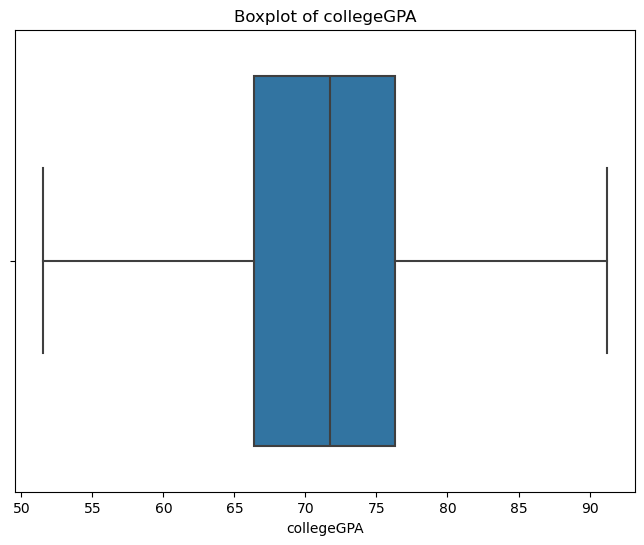

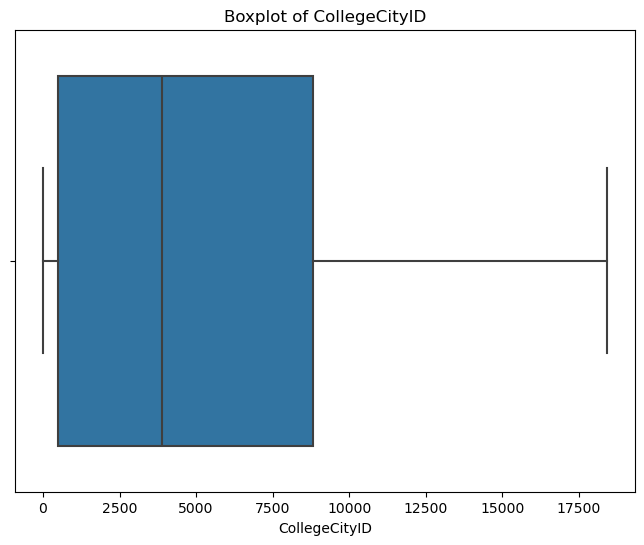

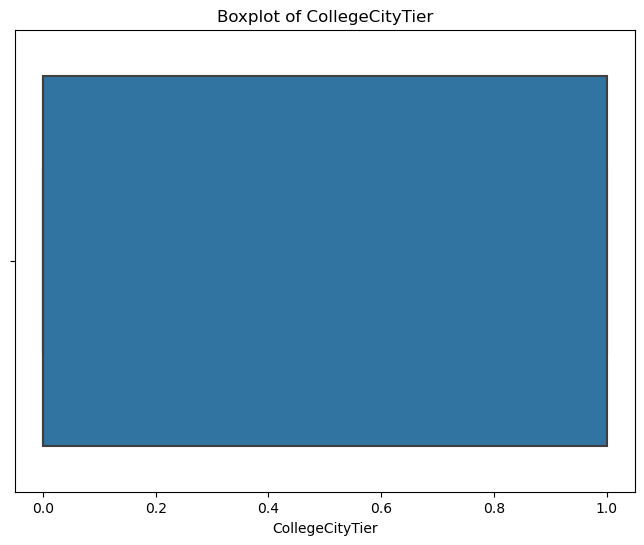

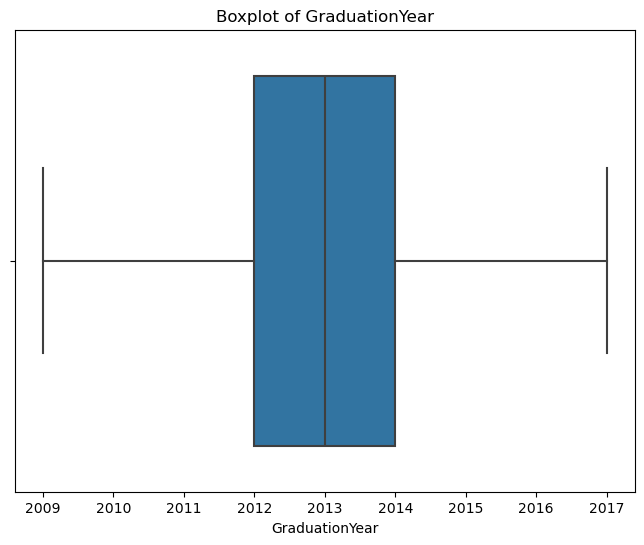

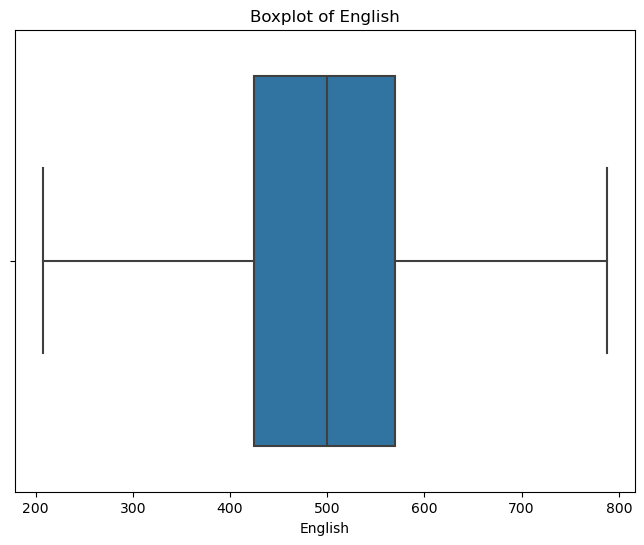

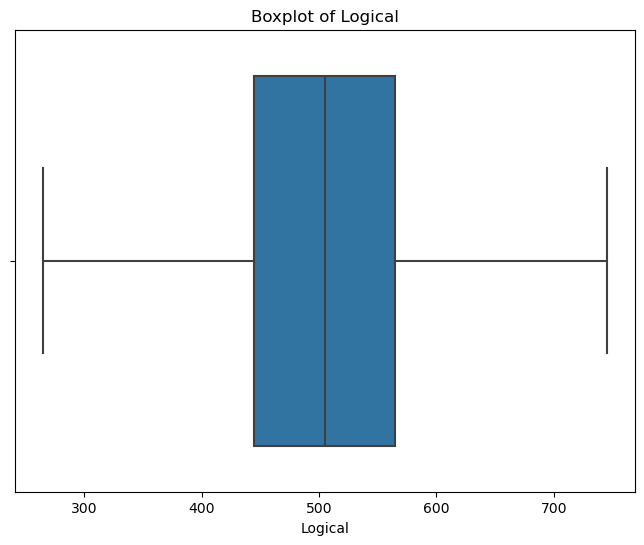

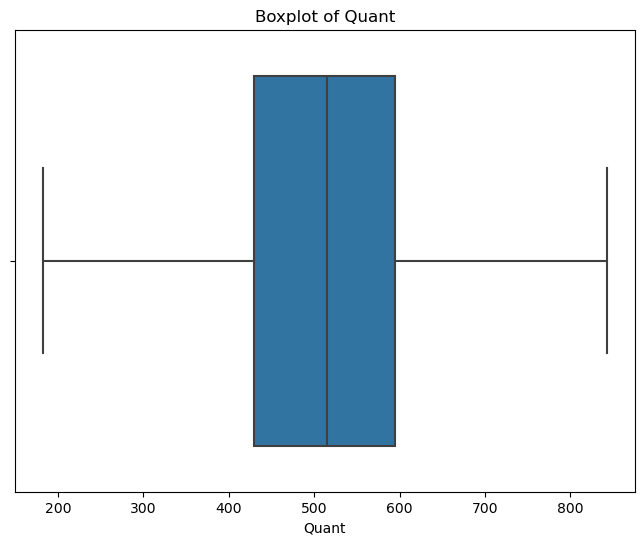

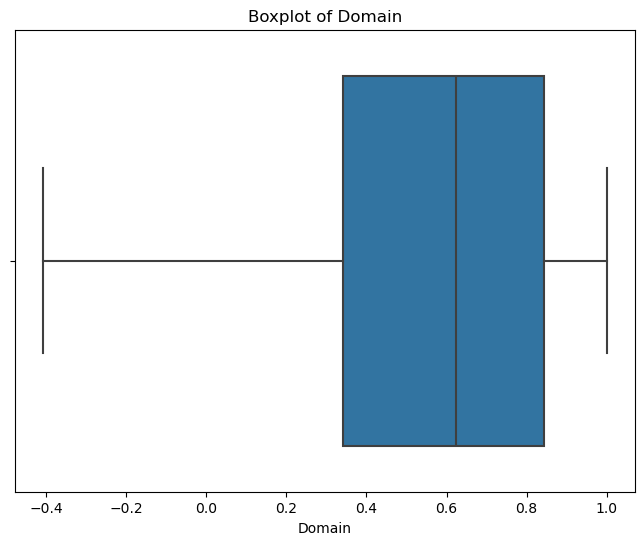

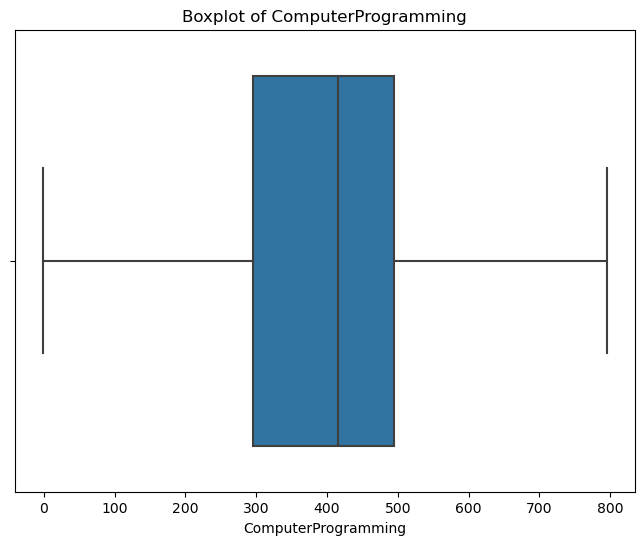

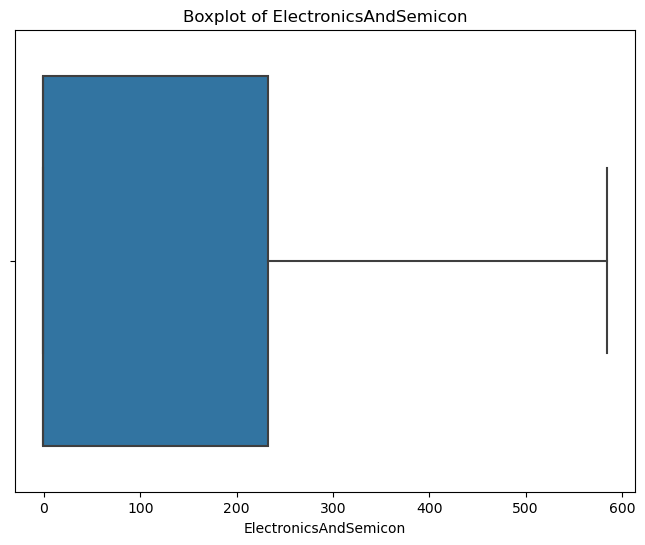

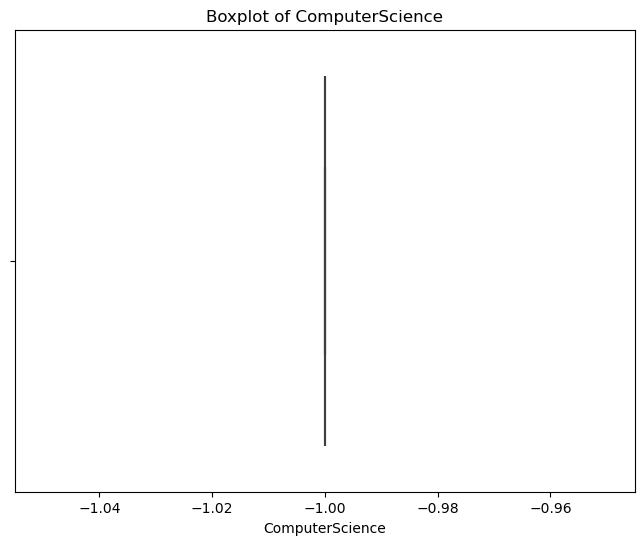

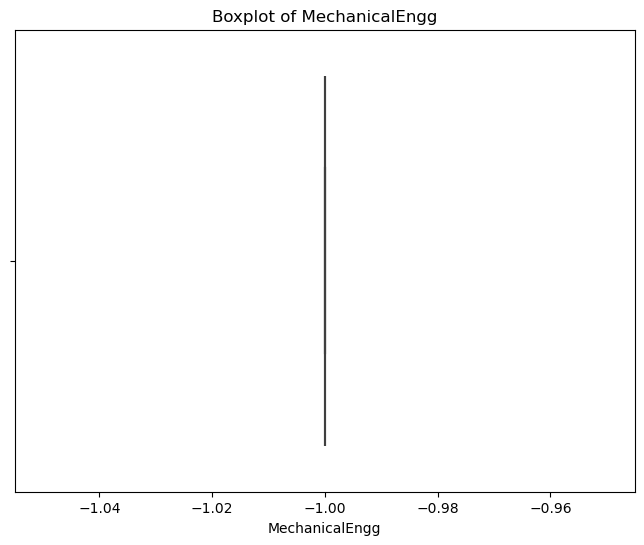

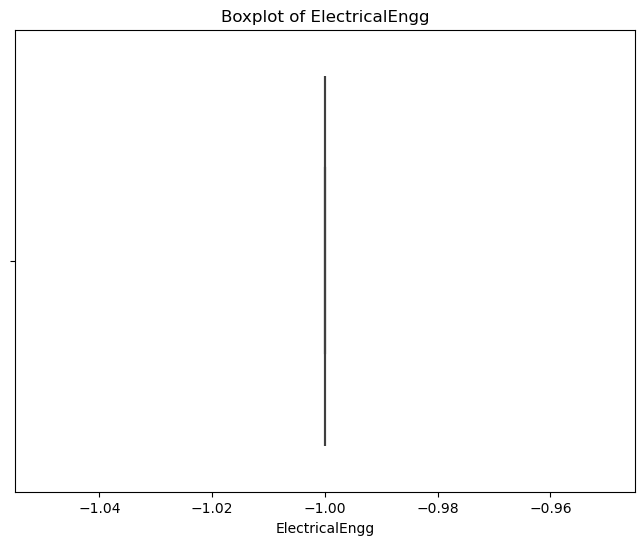

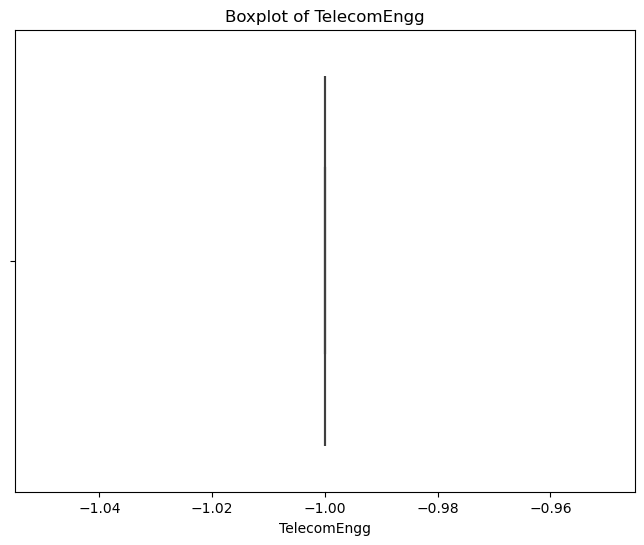

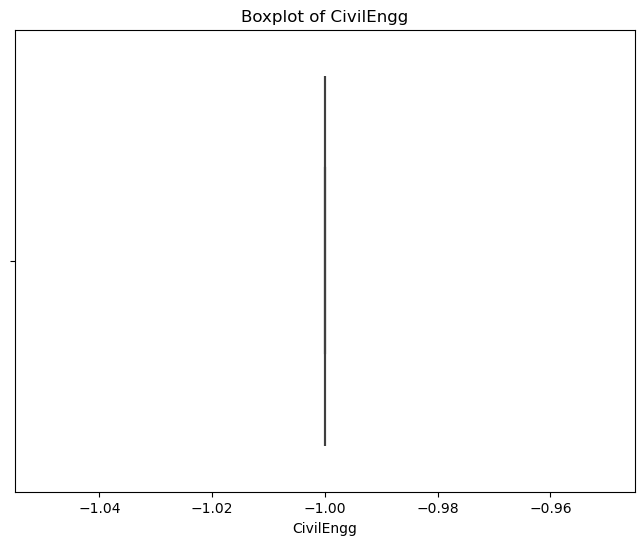

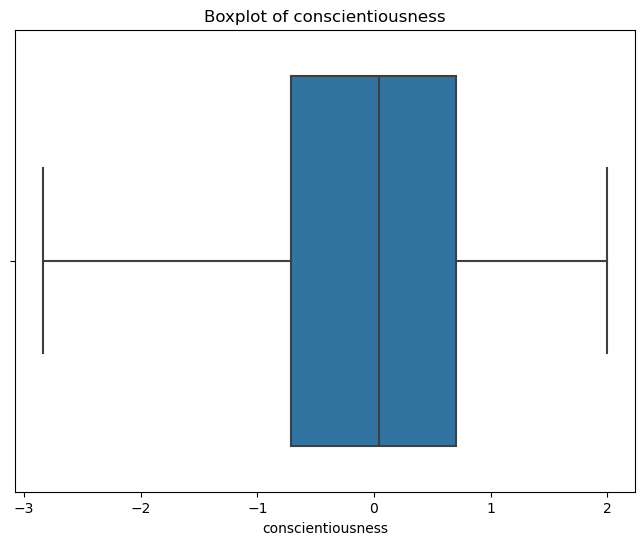

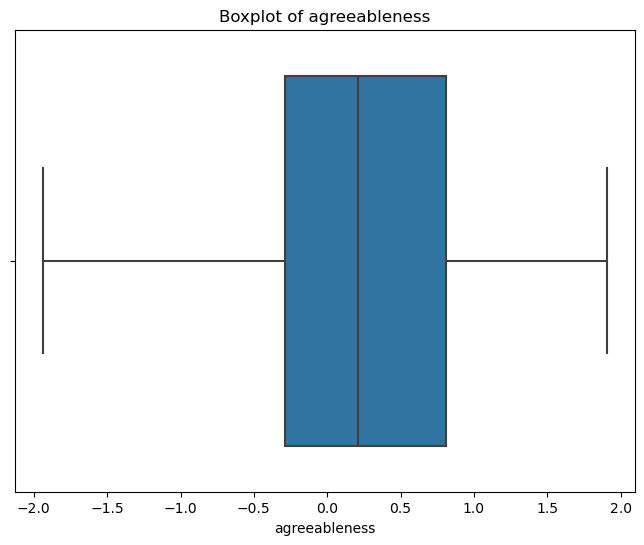

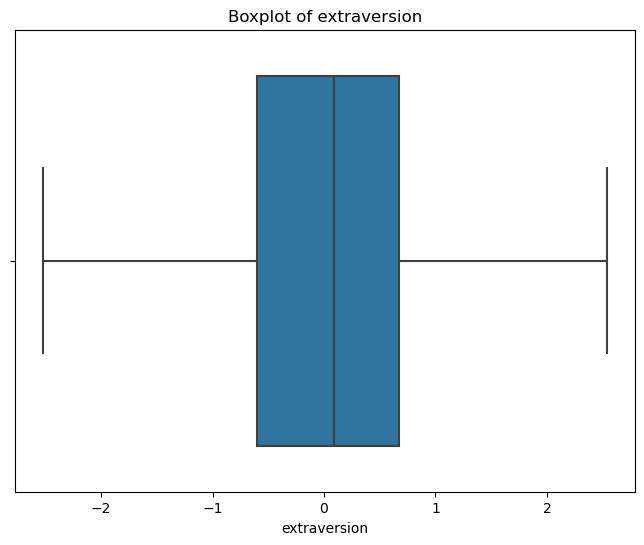

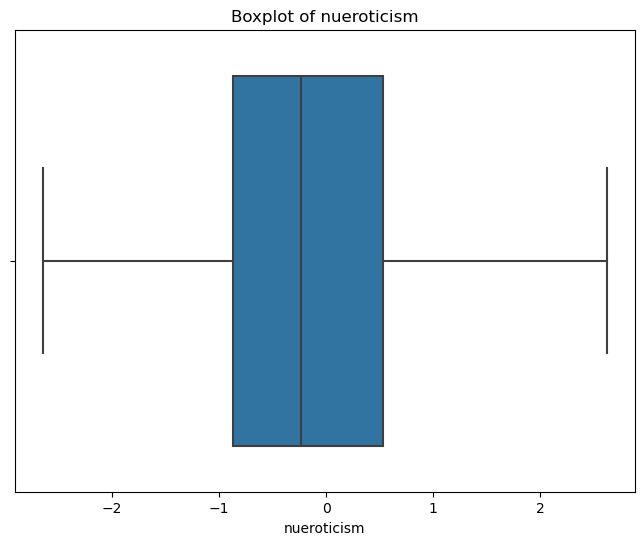

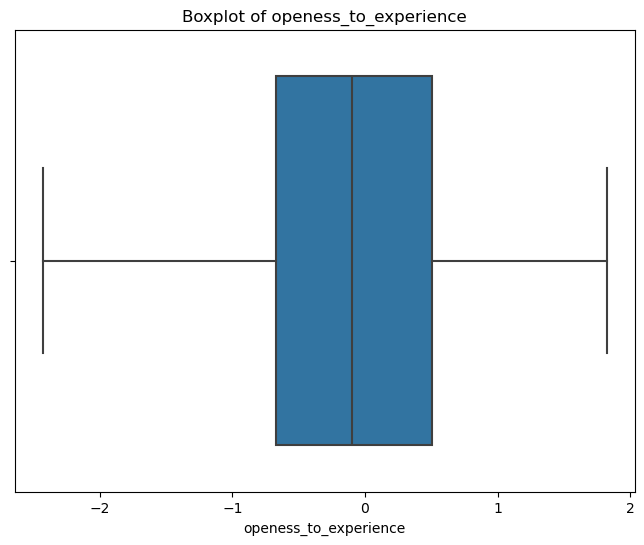

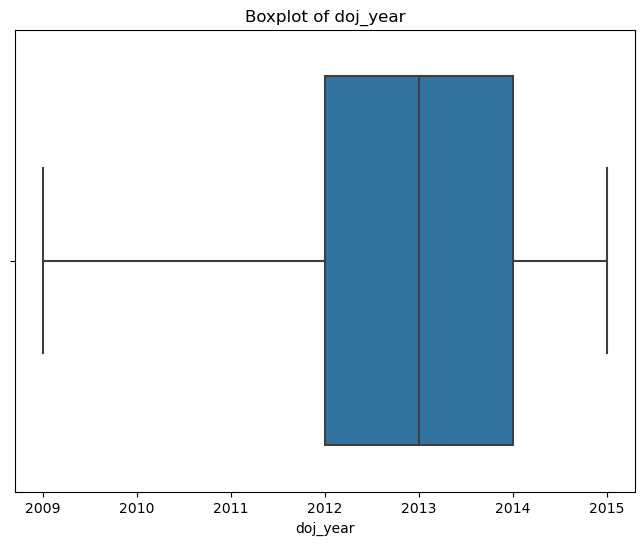

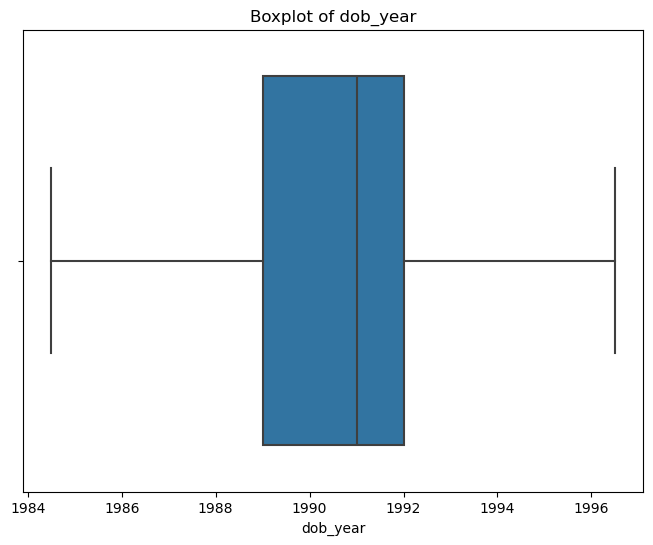

In [71]:
for i in num_col:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[i])
    plt.title(f'Boxplot of {i}')
    plt.show()


# converting all cat columns into lower

In [72]:
df[df.select_dtypes(include='object').columns] = df.select_dtypes(include='object').apply(lambda col: col.str.lower())


# bi variate analysis and multivariate analysis

In [73]:
# correaltion between the 10, 12, degree, collage tier,English	Logical	Quant	Domain	ComputerProgramming	ElectronicsAndSemicon	
#ComputerScience	MechanicalEngg	ElectricalEngg	TelecomEngg	CivilEngg with salary
 # correlation between the doj_y . dob_y, designation ,jobcity,gender,10th borad,12 board,degree,specialization,,collage state,graduation year vs salary

In [74]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism', 'openess_to_experience',
       'doj_year', 'dob_year'],
      dtype='object')

In [75]:
df.head(2)

ID  Salary        DOJ      DOL              Designation    JobCity  \
0  203097  420000 2012-06-01  present  senior quality engineer  bangalore   
1  579905  500000 2013-09-01  present        assistant manager     indore   

  Gender        DOB  10percentage                         10board  \
0      f 1990-02-19          84.3  board ofsecondary education,ap   
1      m 1989-10-04          85.4                            cbse   

   12graduation  12percentage                             12board  CollegeID  \
0          2007          95.8  board of intermediate education,ap       1141   
1          2007          85.0                                cbse       5807   

   CollegeTier       Degree                             Specialization  \
0            2  b.tech/b.e.                       computer engineering   
1            2  b.tech/b.e.  electronics and communication engineering   

   collegeGPA  CollegeCityID  CollegeCityTier    CollegeState  GraduationYear  \
0       78.00           1141                0  andhra pradesh            2011   
1       70.06           5807                0  madhya pradesh            2012   

   English  Logical  Quant    Domain  ComputerProgramming  \
0    515.0      585  525.0  0.635979                  445   
1    695.0      610  780.0  0.960603                   -1   

   ElectronicsAndSemicon  ComputerScience  MechanicalEngg  ElectricalEngg  \
0                     -1               -1              -1              -1   
1                    466               -1              -1              -1   

   TelecomEngg  CivilEngg  conscientiousness  agreeableness  extraversion  \
0           -1         -1             0.9737         0.8128        0.5269   
1           -1         -1            -0.7335         0.3789        1.2396   

   nueroticism  openess_to_experience  doj_year  dob_year  
0       1.3549                -0.4455      2012    1990.0  
1      -0.1076                 0.8637      2013    1989.0

In [76]:
#  doj_y vs salary


In [77]:
df["doj_year"].nunique()

7

In [78]:
df["doj_year"].value_counts()

doj_year
2014    1596
2013    1004
2012     590
2011     381
2015     248
2010     166
2009      13
Name: count, dtype: int64

In [79]:
df[df["doj_year"]==2010]["Salary"].sum()/166

395000.0

In [80]:
df[df["doj_year"]==2010].shape

(166, 40)

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


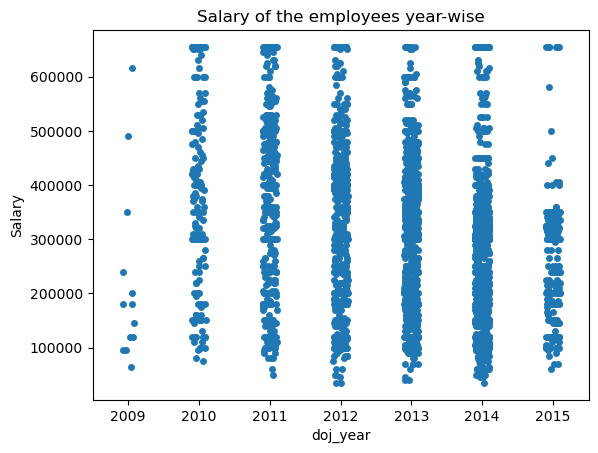

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.stripplot(x="doj_year", y="Salary", data=df, jitter=True)
plt.title("Salary of the employees year-wise")

save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\1.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)

plt.show()


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1345130338.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="doj_year", y="Salary", data=df, ci=None)


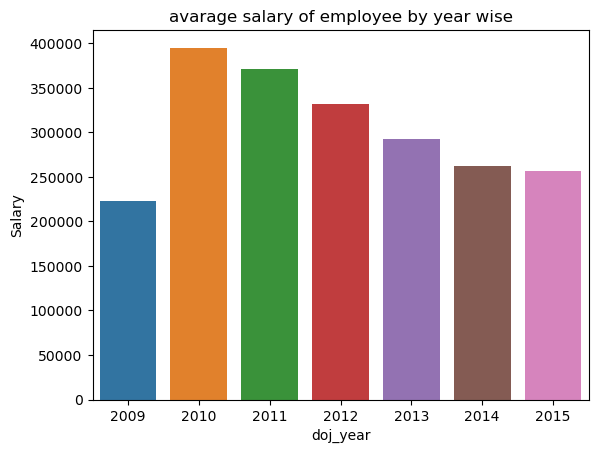

In [82]:

sns.barplot(x="doj_year", y="Salary", data=df, ci=None)
plt.title("avarage salary of employee by year wise")
plt.show()


In [83]:
# Designation vs salary


In [84]:
df.groupby(["Designation"])["Salary"].sum()


Designation
.net developer                   7595000
.net web developer                785000
account executive                1150000
account manager                   350000
admin assistant                   205000
                                  ...   
web designer and seo              200000
web developer                    9125000
web intern                        205000
website developer/tester          200000
windows systems administrator     200000
Name: Salary, Length: 419, dtype: int64

In [85]:
# JobCity vs salary


In [86]:
df.pivot_table(values="Salary", index="JobCity", aggfunc="sum").sort_values(by="Salary", ascending=False)

Salary
JobCity                          
bangalore               221045000
noida                   111095000
hyderabad               108545000
pune                    101395000
chennai                  87675000
...                           ...
technopark, trivandrum      85000
bhubaneswar                 80000
trichur                     75000
muvattupuzha                65000
howrah                      60000

[261 rows x 1 columns]

In [87]:
# dob_y vs salary


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\1608130785.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="dob_year", y="Salary", data=df, ci=None)


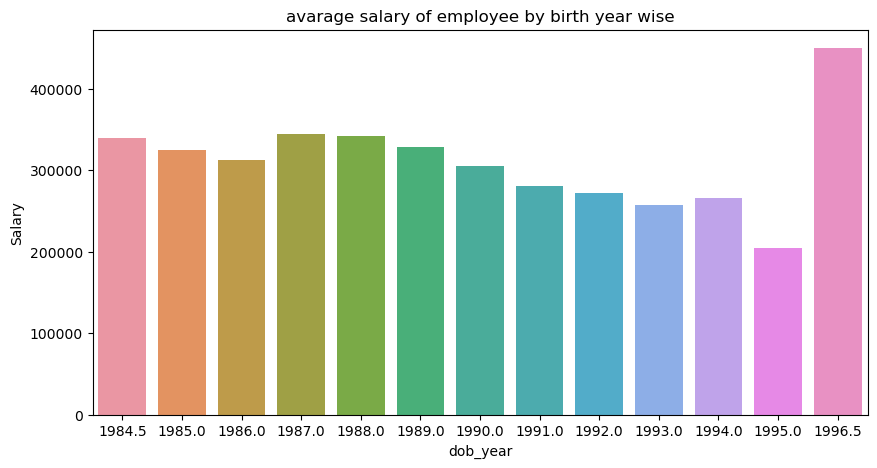

In [88]:
plt.figure(figsize=(10,5))
sns.barplot(x="dob_year", y="Salary", data=df, ci=None)
plt.title("avarage salary of employee by birth year wise")
plt.show()


In [89]:
# 10percentage	vs salary


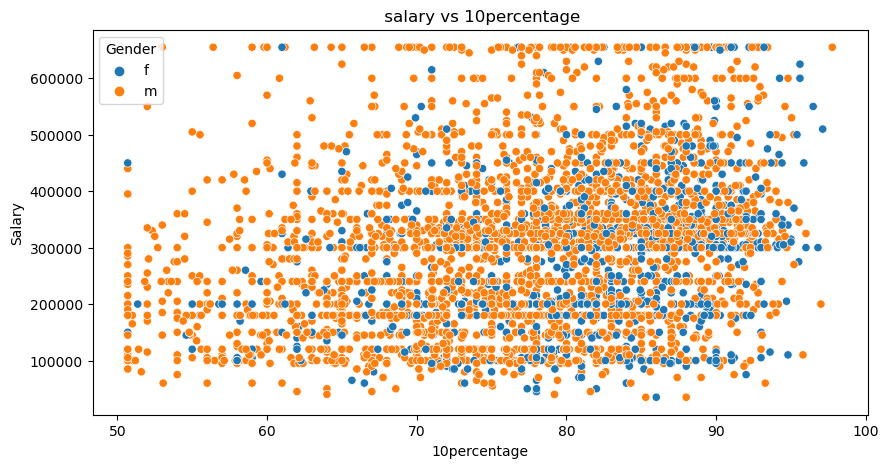

In [90]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="10percentage", y="Salary", data=df,hue="Gender")
plt.title(" salary vs 10percentage")
plt.show()


In [91]:
# 12graduation vs salary


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\2704034728.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="12graduation", y="Salary", data=df, ci=None,hue="Gender")


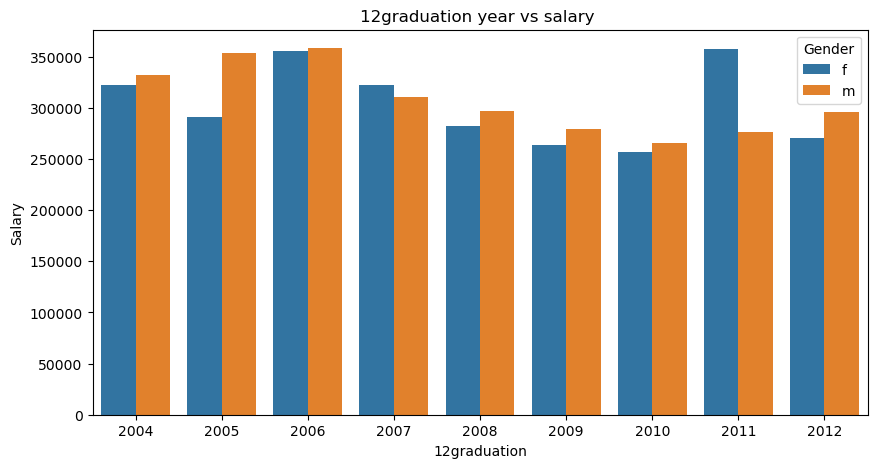

In [124]:
plt.figure(figsize=(10,5))
sns.barplot(x="12graduation", y="Salary", data=df, ci=None,hue="Gender")
plt.title("12graduation year vs salary ")

save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\2.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [93]:
# 12percentage	vs salary



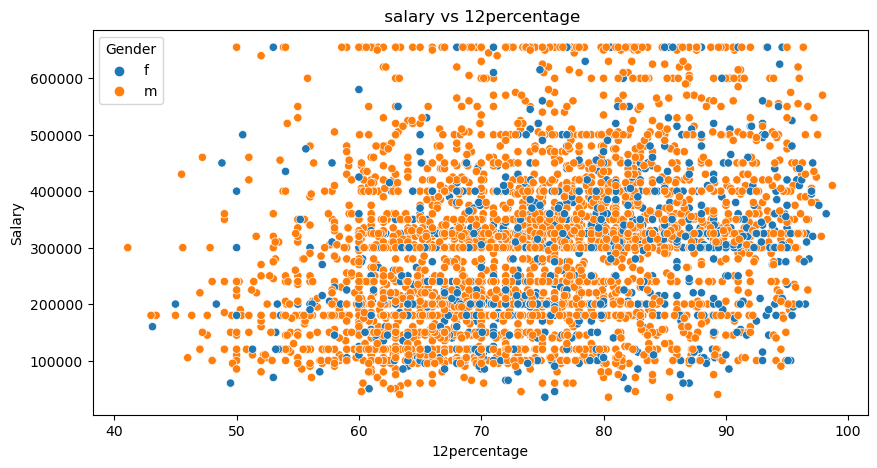

In [125]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="12percentage", y="Salary", data=df,hue="Gender")
plt.title(" salary vs 12percentage")
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\3.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [95]:
# Degree vs salary


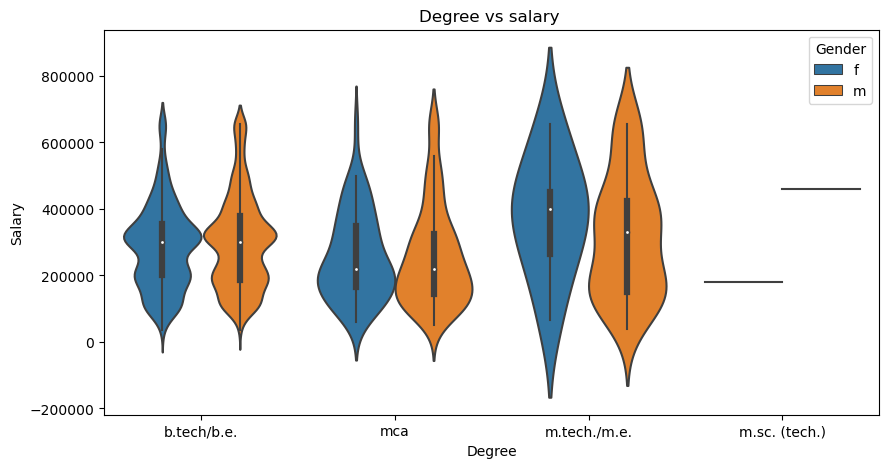

In [126]:
plt.figure(figsize=(10,5))
sns.violinplot(x="Degree", y="Salary", data=df, ci=None,hue="Gender")
plt.title("Degree vs salary ")
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\4.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [97]:
# Specialization vs salary


C:\Users\jeeva\AppData\Local\Temp\ipykernel_14188\3062943908.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Specialization", y="Salary", data=df, ci=None)


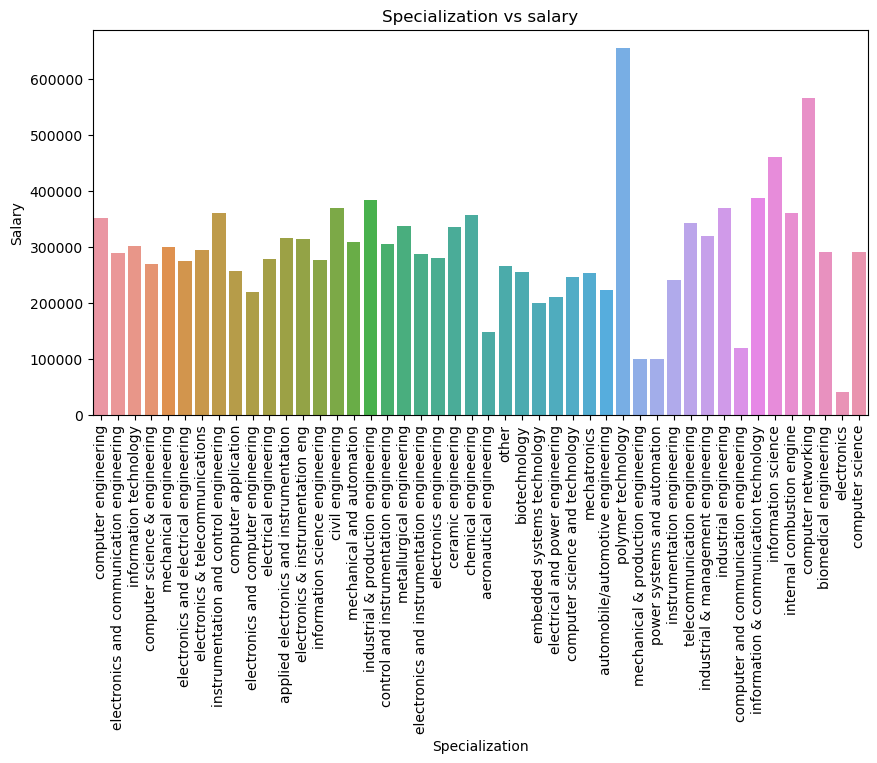

In [127]:
plt.figure(figsize=(10,5))
sns.barplot(x="Specialization", y="Salary", data=df, ci=None)
plt.title("Specialization vs salary")
plt.xticks(rotation=90)
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\5.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [99]:
# collegeGPA vs salary


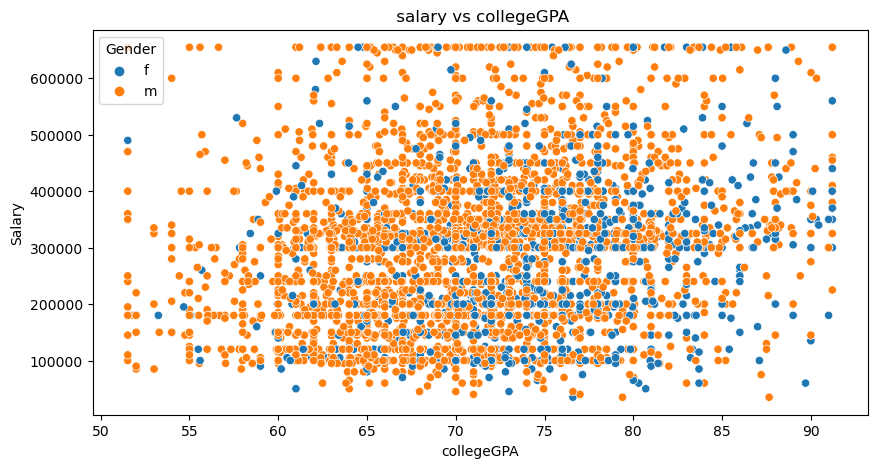

In [128]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="collegeGPA", y="Salary", data=df,hue="Gender")
plt.title(" salary vs collegeGPA")
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\6.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [101]:
# CollegeState vs salary


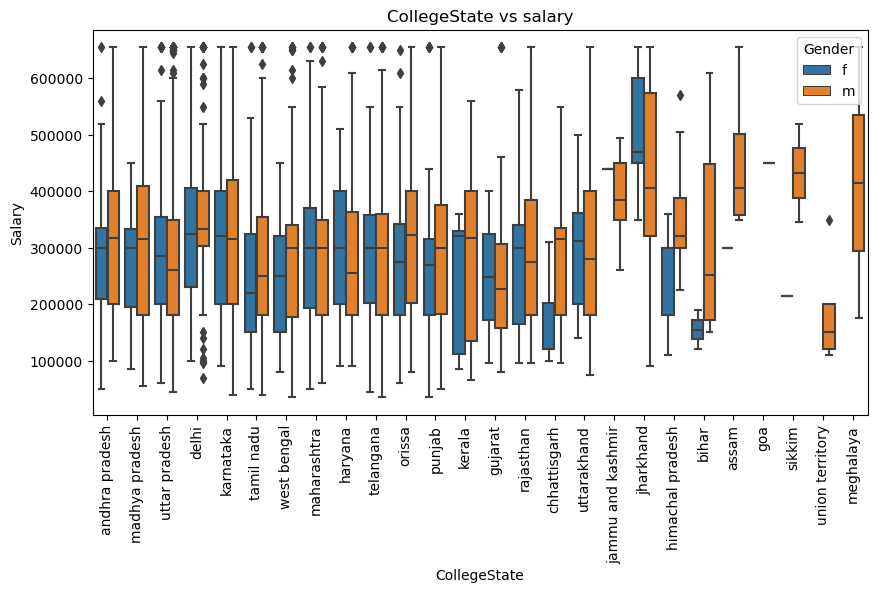

In [129]:
plt.figure(figsize=(10,5))
sns.boxplot(x="CollegeState", y="Salary", data=df,hue="Gender")
plt.title("CollegeState vs salary")
plt.xticks(rotation=90)
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\7.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


In [103]:
# 	GraduationYear vs salary

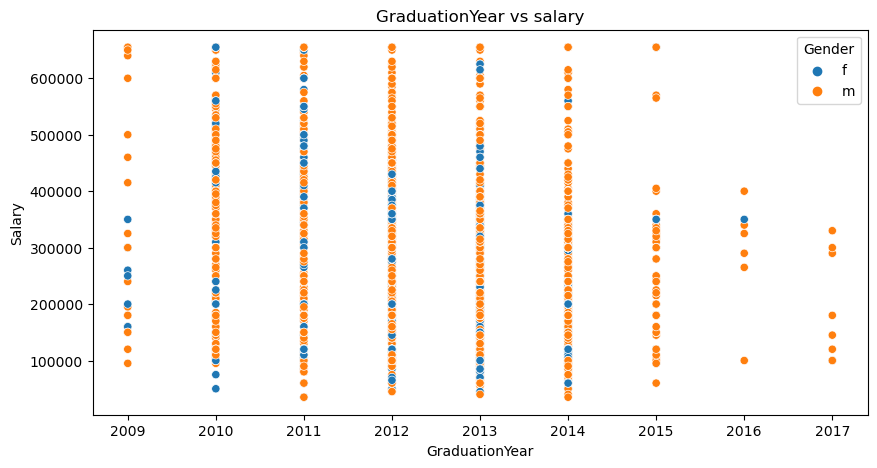

In [130]:
plt.figure(figsize=(10,5))
sns.scatterplot(x="GraduationYear", y="Salary", data=df,hue="Gender")
plt.title("GraduationYear vs salary")
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\8.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


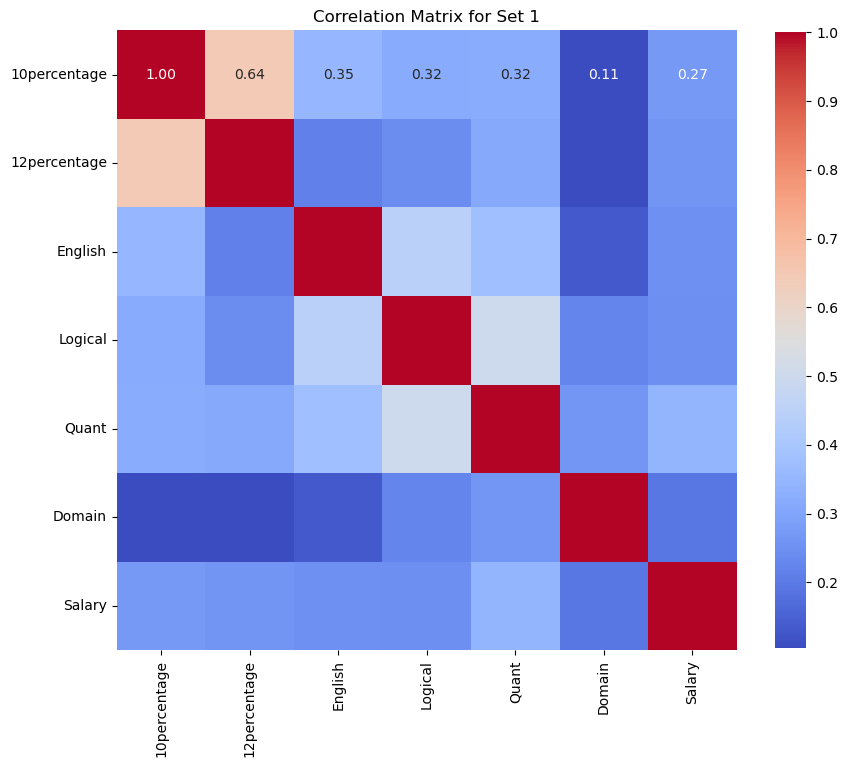

In [131]:

features_set1 = ['10percentage', '12percentage',   
                 'English', 'Logical', 'Quant', 'Domain', 
                  'Salary']
correlation_set1 = df[features_set1].corr()

plt.figure(figsize=(10,10))

sns.heatmap(correlation_set1, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Set 1')
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\9.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()




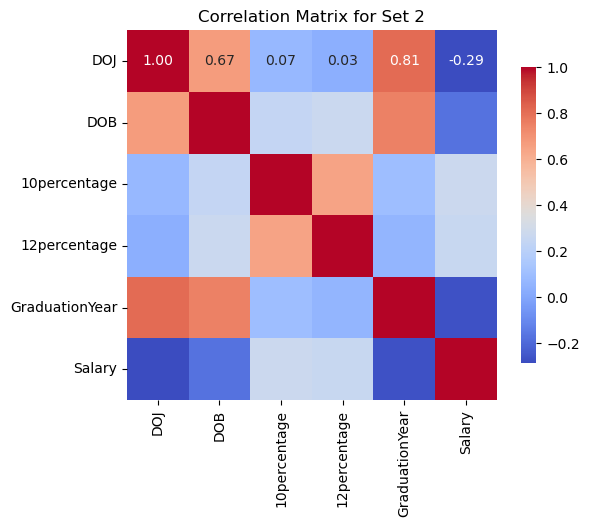

In [137]:


features_set2 = ['DOJ', 'DOB', 
                 '10percentage', '12percentage', 
                  'GraduationYear', 'Salary']
correlation_set2 = df[features_set2].corr()

sns.heatmap(correlation_set2, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix for Set 2')
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\15.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()



In [107]:
numerical_cols = df.select_dtypes(include='number').columns 


C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

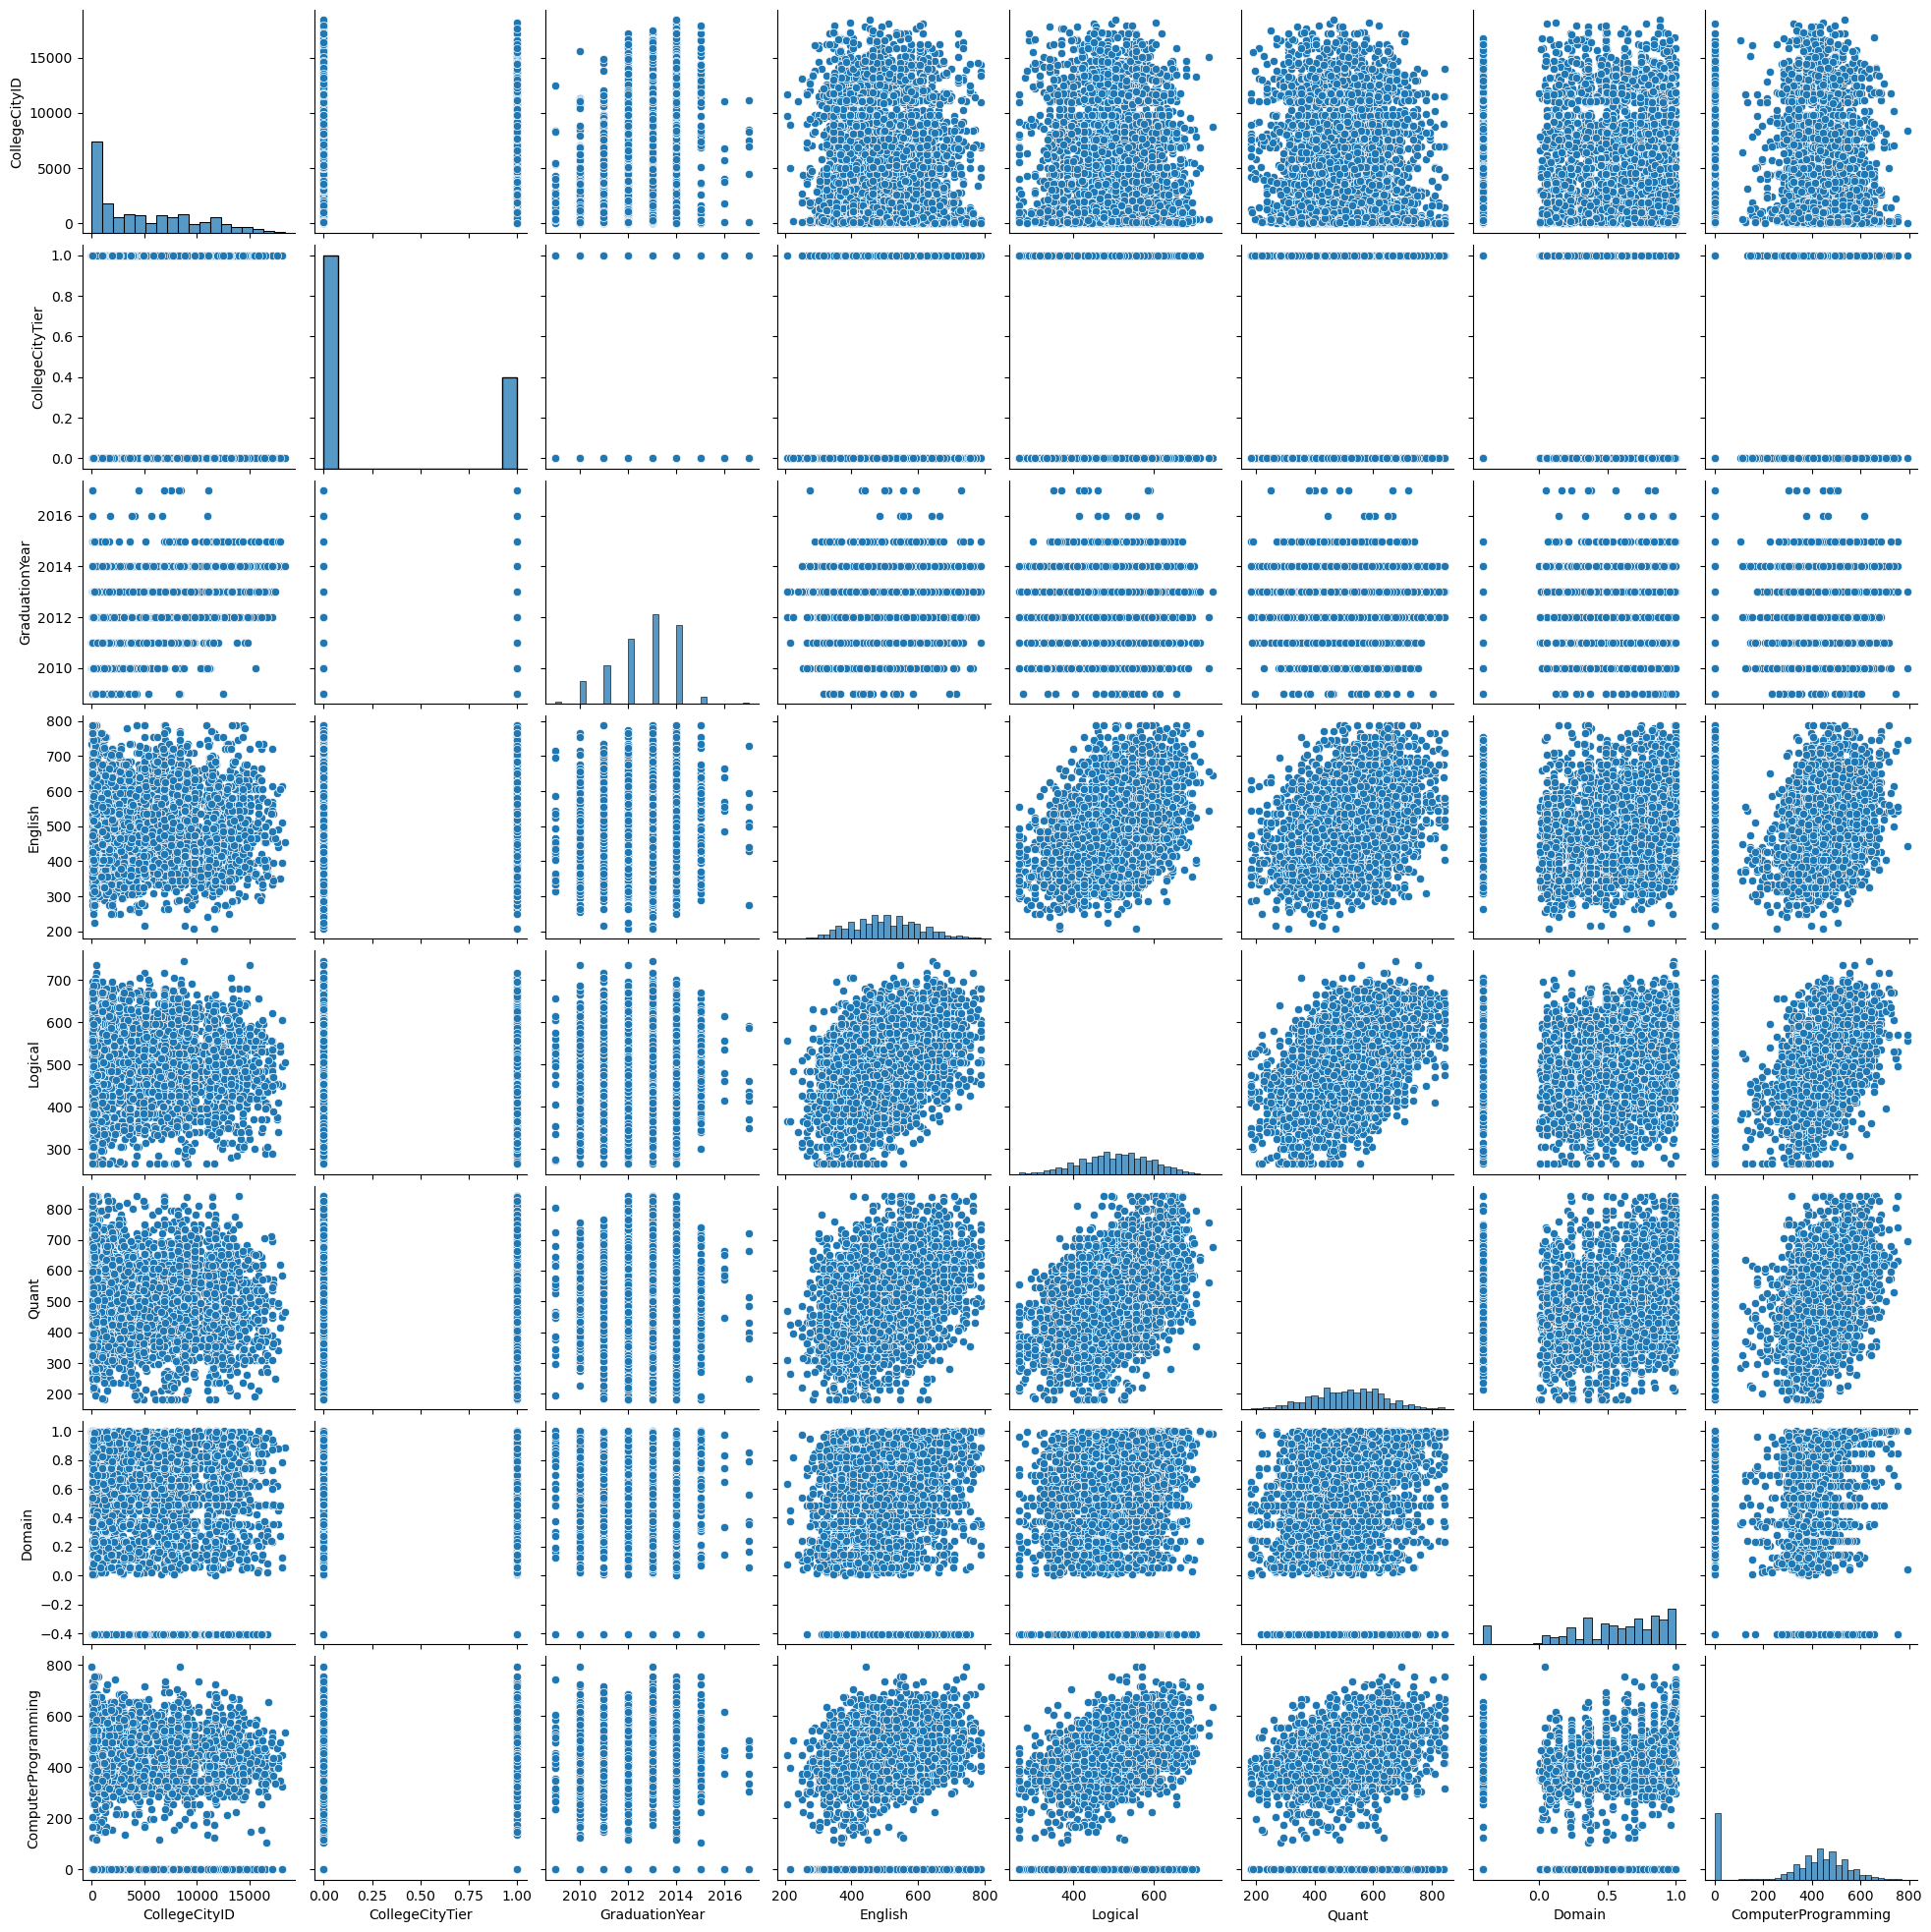

In [132]:
l1=['CollegeCityID',
       'CollegeCityTier', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming']
sns.pairplot(df[l1])
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\10.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

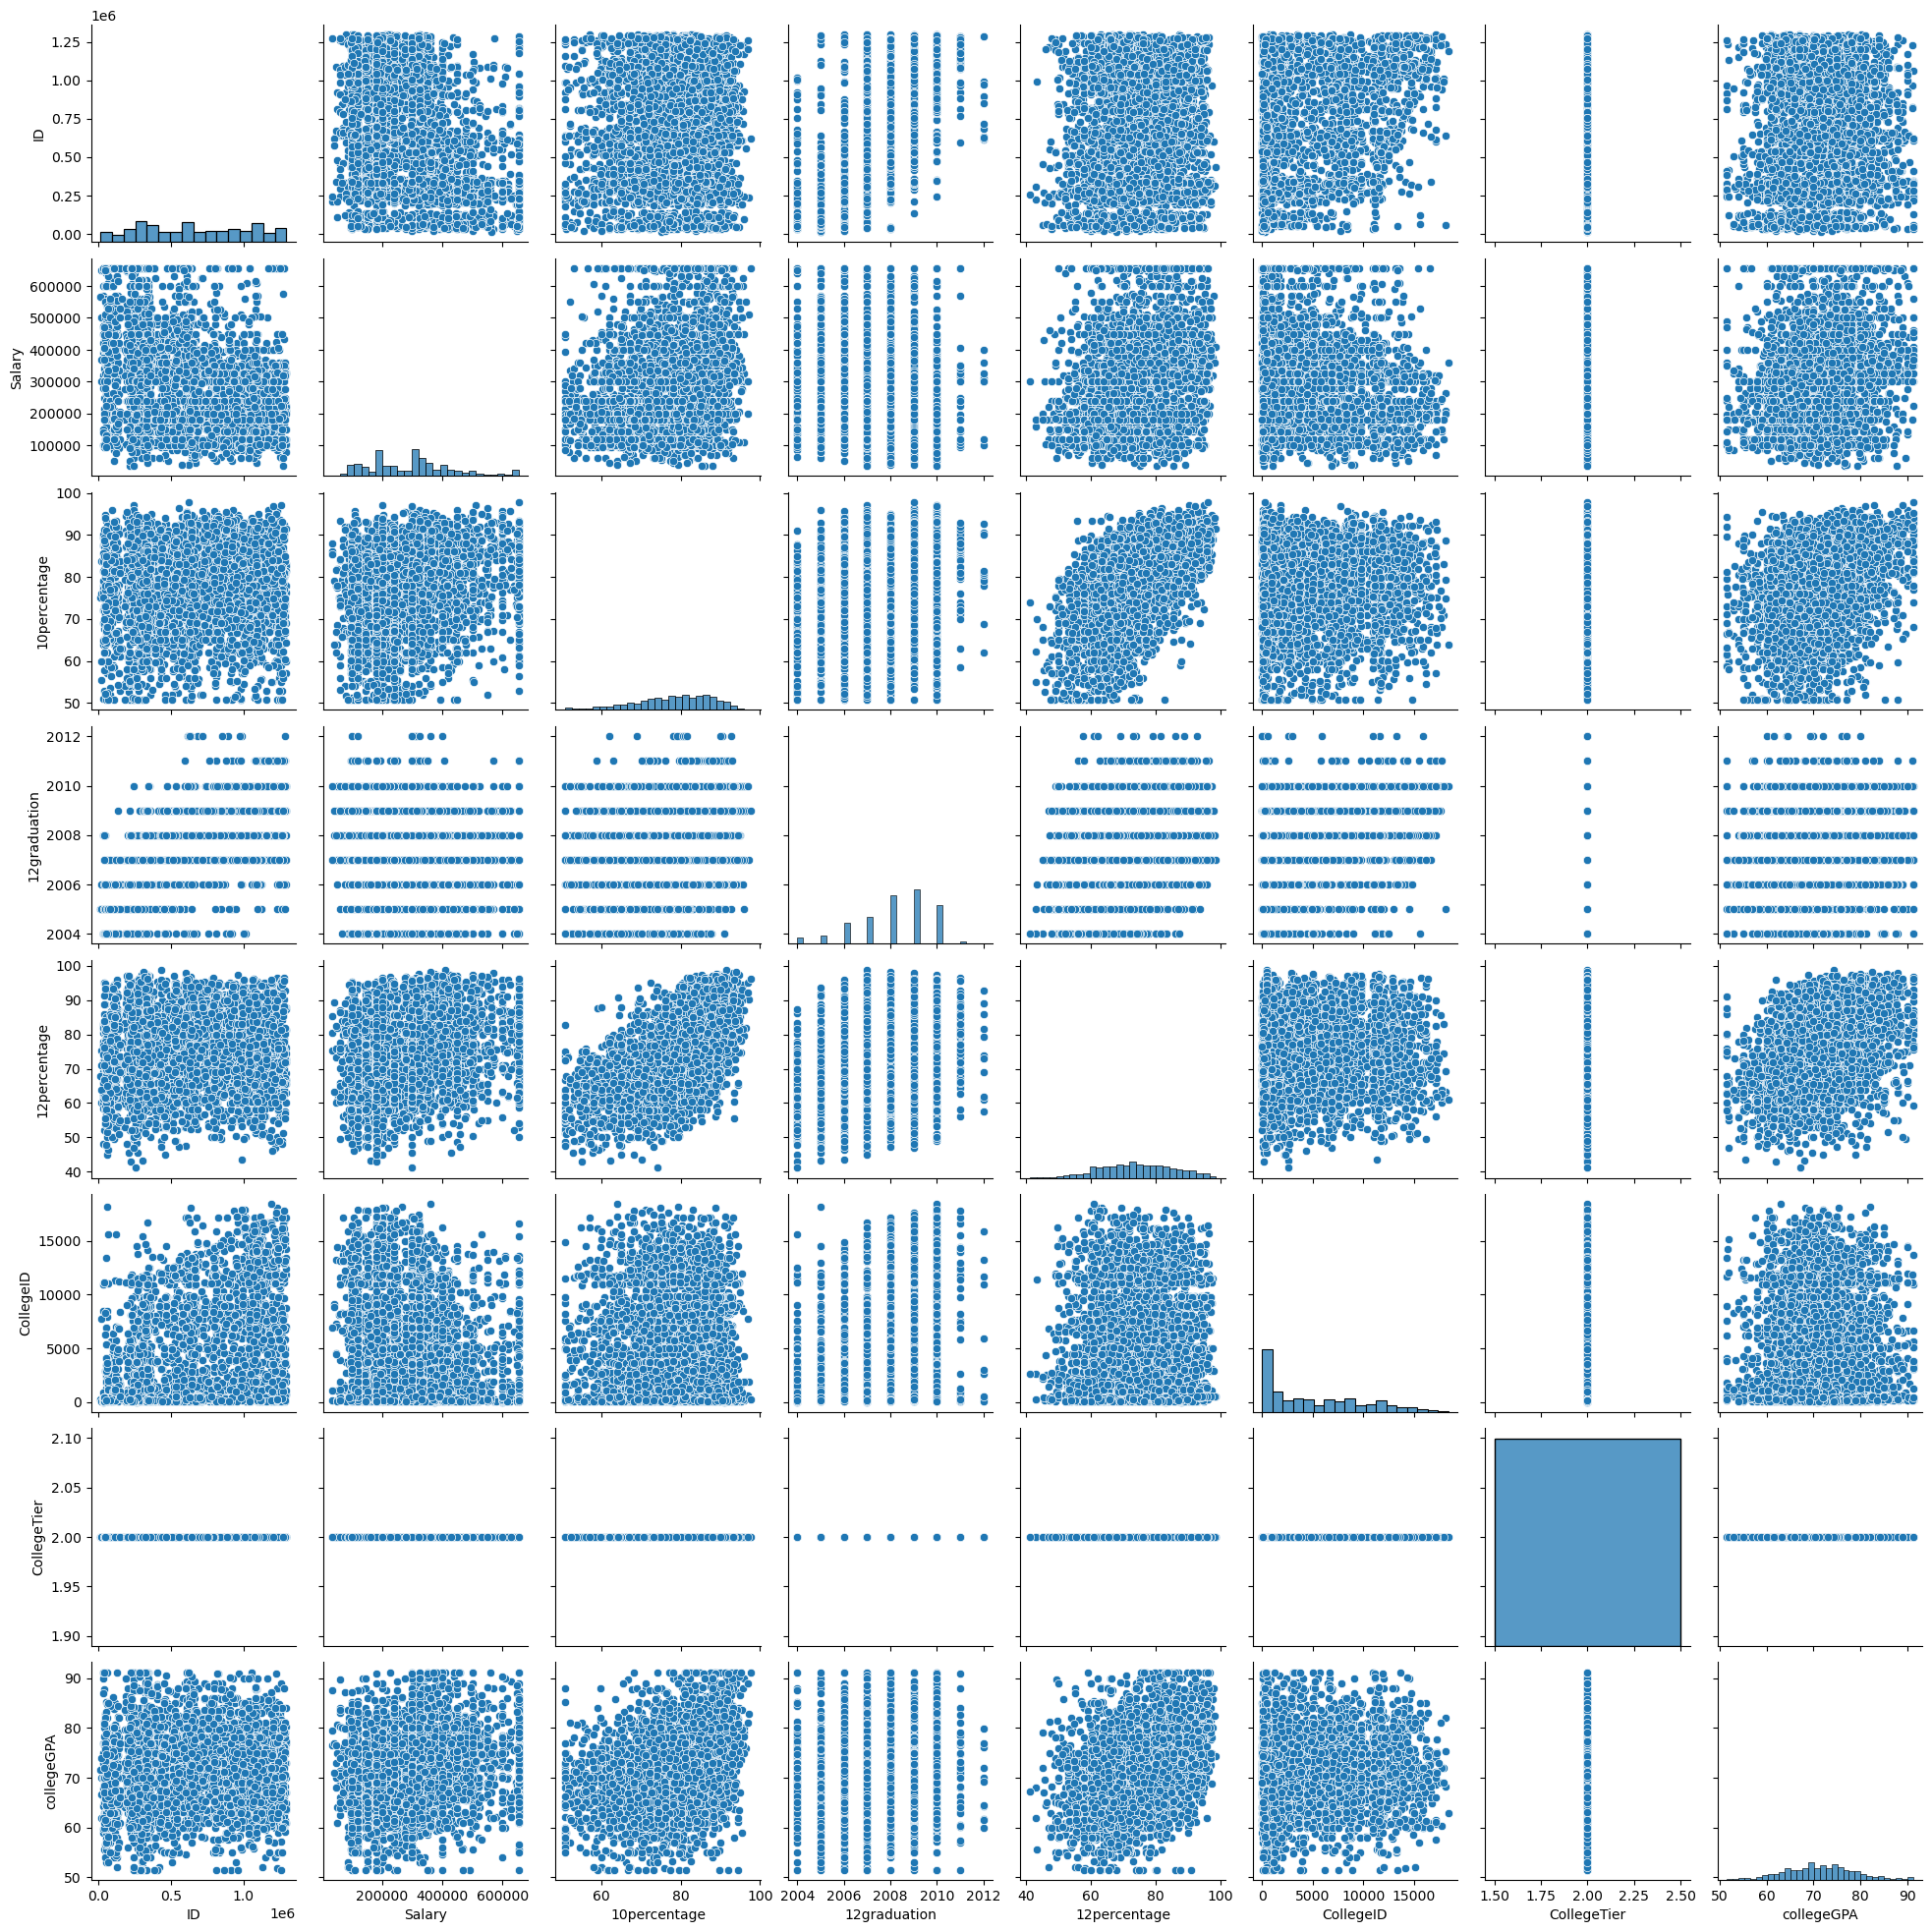

In [133]:
l11=['ID', 'Salary', '10percentage', '12graduation', '12percentage',
       'CollegeID', 'CollegeTier', 'collegeGPA']
sns.pairplot(df[l11])
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\11.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

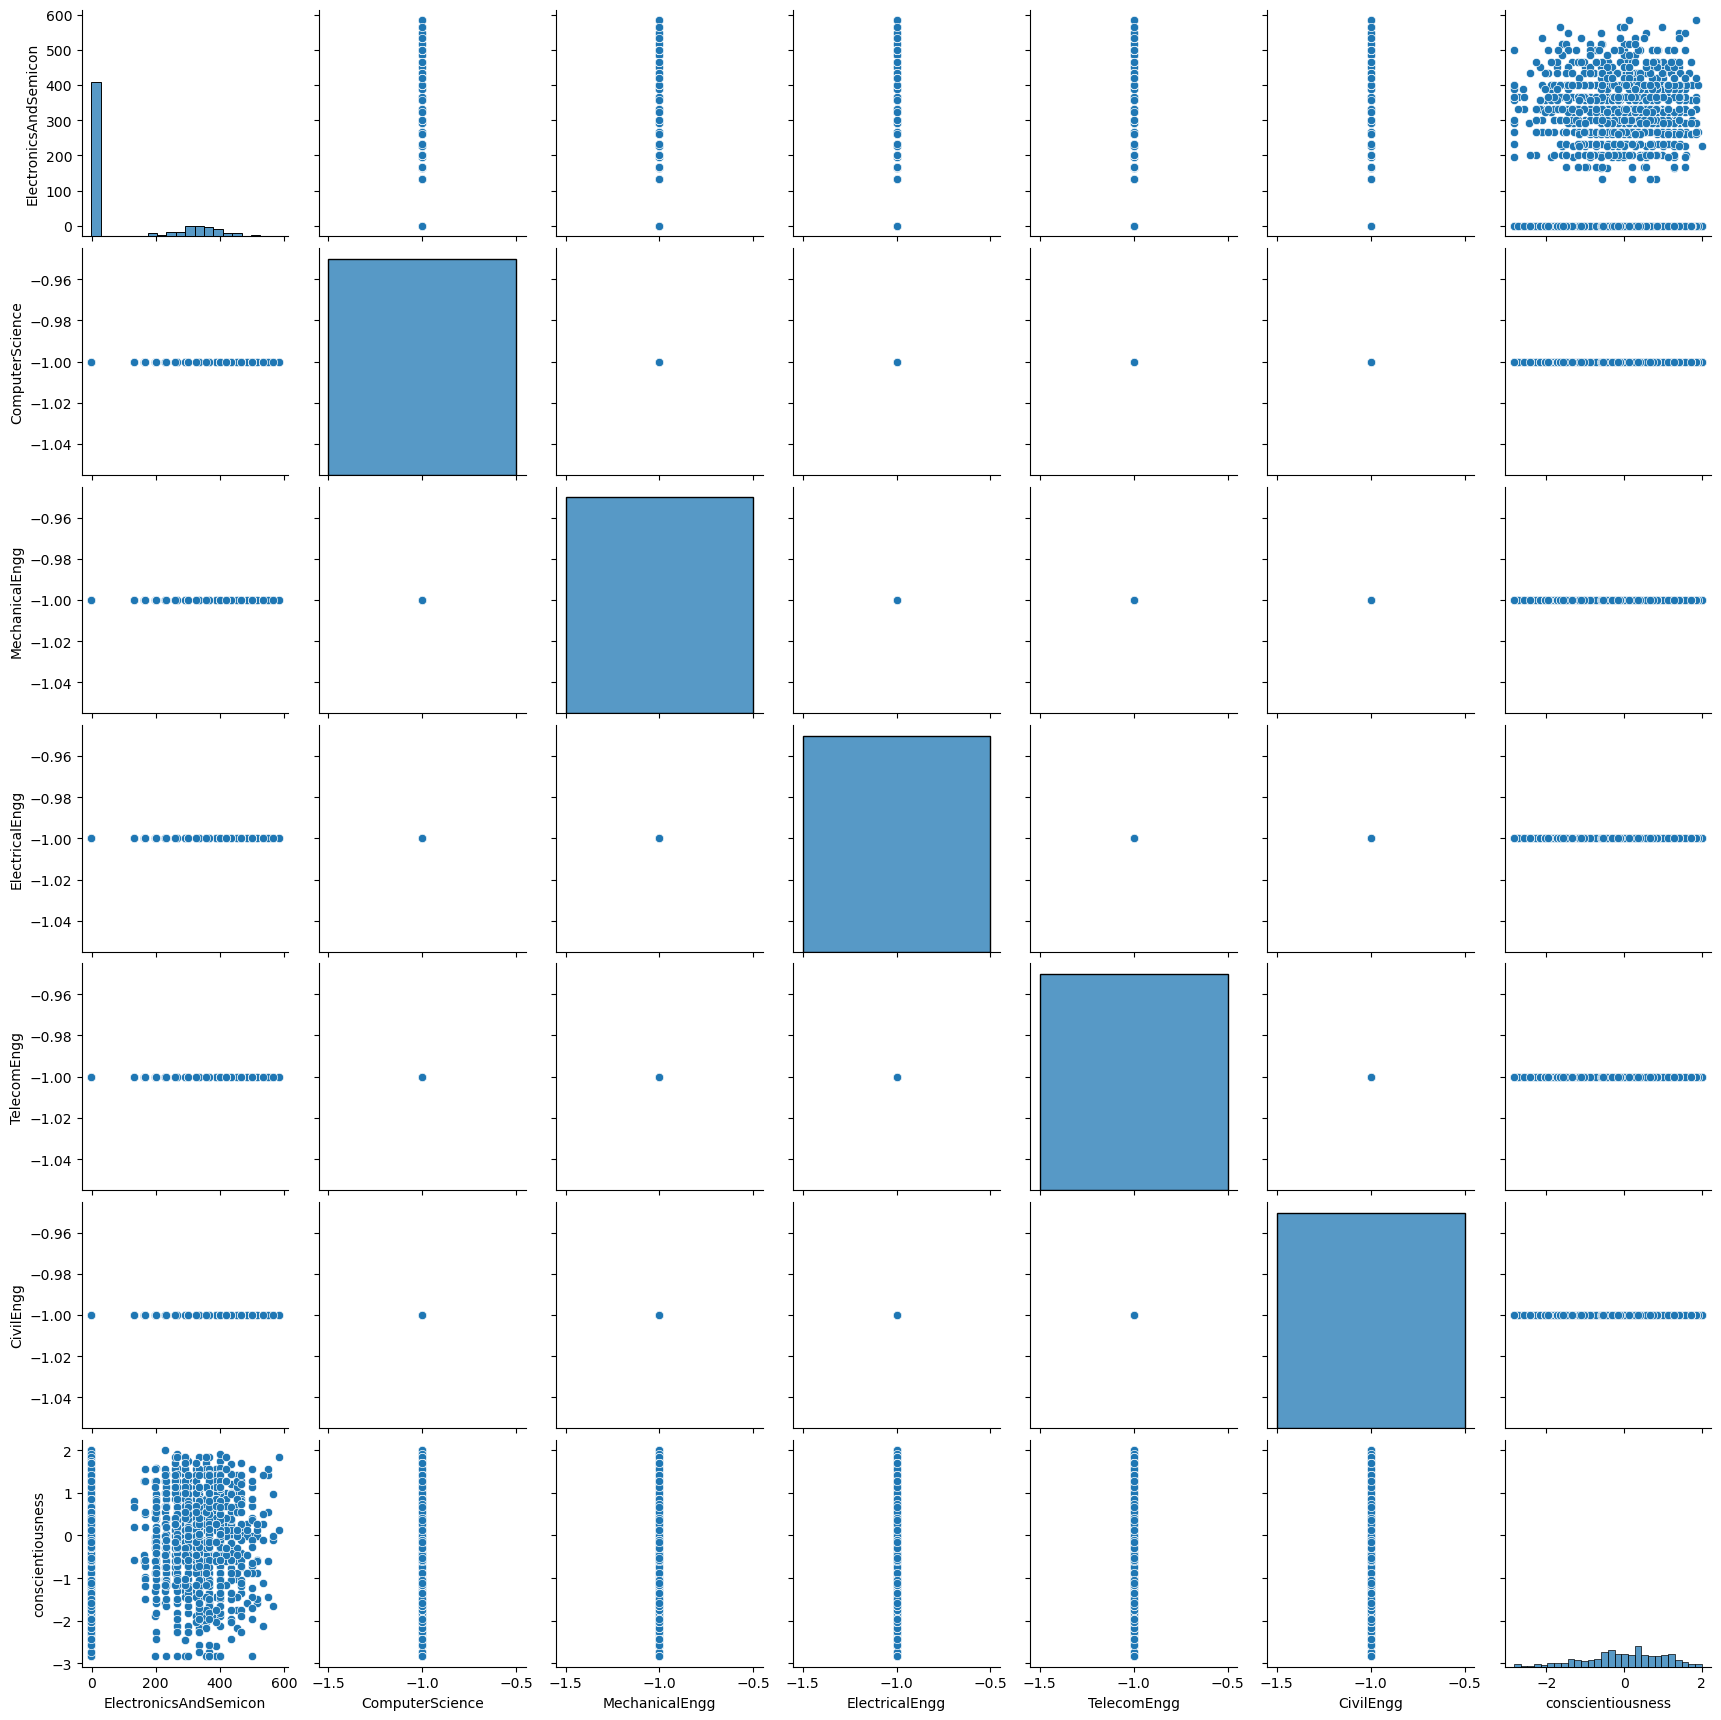

In [134]:
l2=['ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness']
sns.pairplot(df[l2])
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\12.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

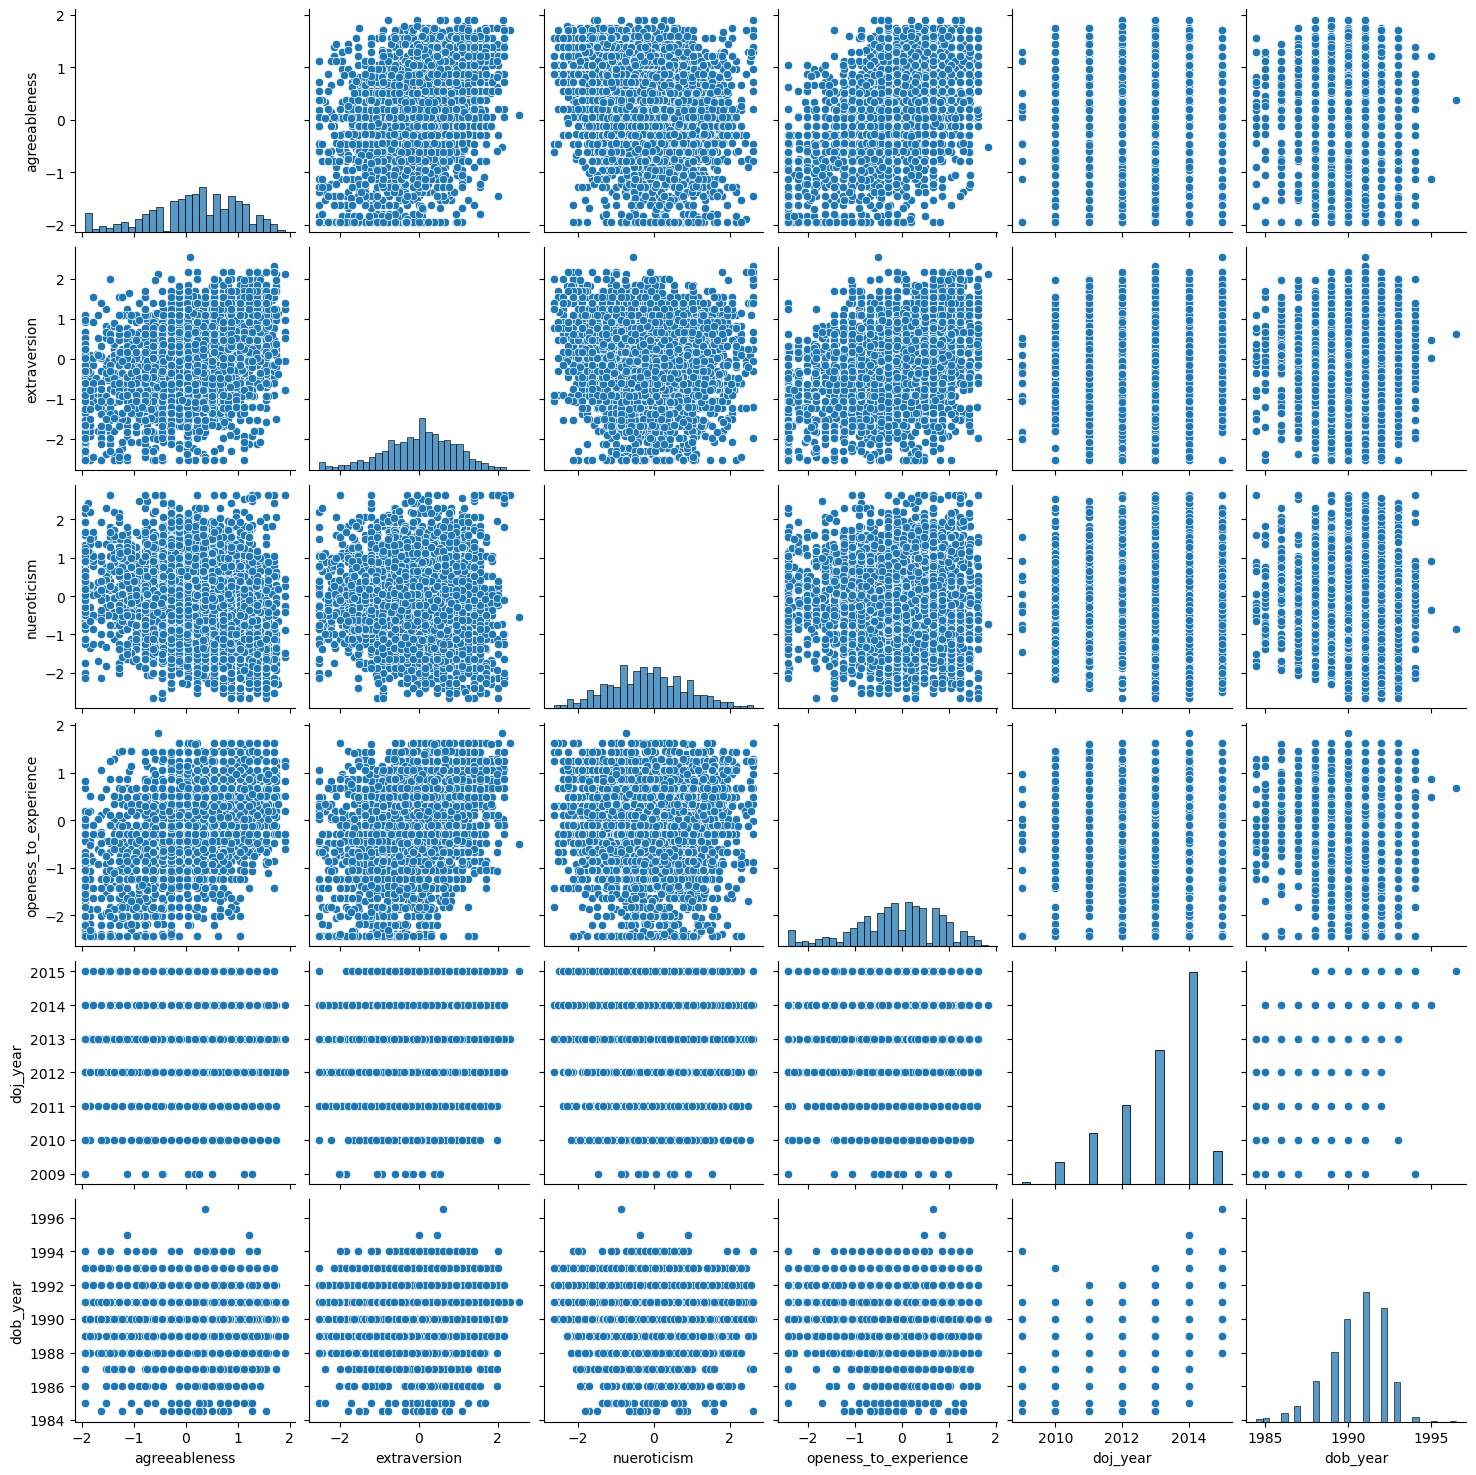

In [135]:
l22=['agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'doj_year', 'dob_year']
sns.pairplot(df[l22])
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\13.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()

C:\Users\jeeva\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


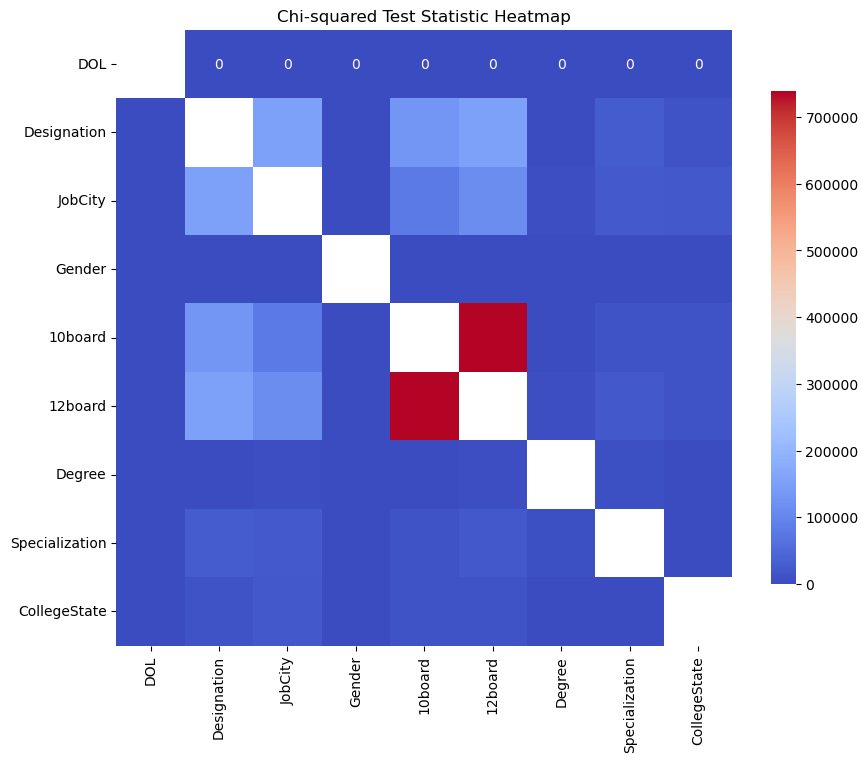

In [136]:

from scipy.stats import chi2_contingency


categorical_cols = df.select_dtypes(include='object').columns

chi2_matrix = pd.DataFrame(index=categorical_cols, columns=categorical_cols)

for col1 in categorical_cols:
    for col2 in categorical_cols:
        if col1 != col2:
            # Create the contingency table
            contingency_table = pd.crosstab(df[col1], df[col2])
            # Perform the Chi-squared test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            chi2_matrix.loc[col1, col2] = chi2
        else:
            chi2_matrix.loc[col1, col2] = np.nan  

chi2_matrix = chi2_matrix.astype(float)

plt.figure(figsize=(10, 8))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title("Chi-squared Test Statistic Heatmap")
save_path = r"M:\innomatics data science\gen ai intership\task\amcat eda\plots\14.png" 
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()
